In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Connect ke R

In [ ]:
!pip install rpy2

In [ ]:
import rpy2
from rpy2 import robjects

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.25.tar.gz'
Content type 'application/x-gzip' length 593414 bytes (579 KB)
downloaded 579 KB


The downloaded source packages are in
	‘/tmp/Rtmp6HJMLn/downloaded_packages’
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Installing package(s) 'BiocVersion', 'DESeq2'
also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘Rcp

In [ ]:
%%R

install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/Rtmp6HJMLn/downloaded_packages’


In [ ]:
%%R

setwd("/content/drive/MyDrive/Tugas Akhir/preprocessing_data")

In [ ]:
%%R

library(dplyr)
library(tidyverse)
library(readr)
#library(DESeq2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Load Data

In [ ]:
%%R

df1 <- read_tsv("train_raw_data.tsv")
head(df1)

New names:
• `` -> `...1`
Rows: 76766 Columns: 1853
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr    (1): ...1
dbl (1852): GSM7461809, MP2PRT_ALL_482, GSE277354_67, MP2PRT_ALL_1066, MP2PR...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 1,853
  ...1     GSM7461809 MP2PRT_ALL_482 GSE277354_67 MP2PRT_ALL_1066 MP2PRT_ALL_613
  <chr>         <dbl>          <dbl>        <dbl>           <dbl>          <dbl>
1 5S_rRNA           0              0            0               0              0
2 5_8S_rR…          0              0            0               0              0
3 7SK               0              0            0               0              0
4 A1BG             59            139            8             175             21
5 A1BG-AS1         27            179           15             291              0
6 A1CF    

In [ ]:
%%R

df_count <- df1 %>% remove_rownames %>% column_to_rownames(var="...1")
head(df_count)

          GSM7461809 MP2PRT_ALL_482 GSE277354_67 MP2PRT_ALL_1066 MP2PRT_ALL_613
5S_rRNA            0              0            0               0              0
5_8S_rRNA          0              0            0               0              0
7SK                0              0            0               0              0
A1BG              59            139            8             175             21
A1BG-AS1          27            179           15             291              0
A1CF               0              0            0               2            622
          GSM3028297 GSE277354_65 MP2PRT_ALL_1005 TCGA_LAML_61 MP2PRT_ALL_1131
5S_rRNA            0            0               0            0               0
5_8S_rRNA          0            0               0            0               0
7SK                0            0               0            0               0
A1BG             215           14             252          109              88
A1BG-AS1          12           32            

In [ ]:
%%R

df2 <- read_tsv("training_info.tsv")
head(df2)

Rows: 1852 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): patient_ID, class
dbl (1): batch

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 3
  patient_ID      class        batch
  <chr>           <chr>        <dbl>
1 GSM7461809      non-leukemia    29
2 MP2PRT_ALL_482  ALL             38
3 GSE277354_67    CML             33
4 MP2PRT_ALL_1066 ALL             38
5 MP2PRT_ALL_613  ALL             38
6 GSM3028297      non-leukemia     8


In [ ]:
%%R

label <- df2 %>% remove_rownames %>% column_to_rownames(var='patient_ID')
head(label)

                       class batch
GSM7461809      non-leukemia    29
MP2PRT_ALL_482           ALL    38
GSE277354_67             CML    33
MP2PRT_ALL_1066          ALL    38
MP2PRT_ALL_613           ALL    38
GSM3028297      non-leukemia     8


In [ ]:
%%R
label <- label[1]
head(label)

                       class
GSM7461809      non-leukemia
MP2PRT_ALL_482           ALL
GSE277354_67             CML
MP2PRT_ALL_1066          ALL
MP2PRT_ALL_613           ALL
GSM3028297      non-leukemia


In [ ]:
%%R

nrow(label)

[1] 1852


In [ ]:
%%R

ncol(df_count)

[1] 1852


In [ ]:
%%R

all(colnames(df_count) %in% rownames(label))

[1] TRUE


In [ ]:
%%R

all(colnames(df_count) == rownames(label))

[1] TRUE


## DEG Analysis

matrix DESeq2

In [ ]:
%%R

dds <- DESeqDataSetFromMatrix(countData = df_count,
                       colData = label,
                       design = ~ class)

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]
In addition: Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors


In [ ]:
%%R

print(dds)

class: DESeqDataSet 
dim: 76766 1852 
metadata(1): version
assays(1): counts
rownames(76766): 5S_rRNA 5_8S_rRNA ... hsa-mir-423 snoZ196
rowData names(0):
colnames(1852): GSM7461809 MP2PRT_ALL_482 ... MP2PRT_ALL_339
  MP2PRT_ALL_779
colData names(1): class


set factor level

In [ ]:
%%R

dds$class <- relevel(dds$class, ref = "non-leukemia")

run DESeq2

In [ ]:
%%R

dds_analysis <- DESeq(dds)

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]
final dispersion estimates
fitting model and testing
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column

simpan hasil dds

In [ ]:
%%R
#saveRDS(dds_analysis, file = "dds_analysis_results_raw.rds")

In [ ]:
%%R
dds_analysis

class: DESeqDataSet 
dim: 76766 1852 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(76766): 5S_rRNA 5_8S_rRNA ... hsa-mir-423 snoZ196
rowData names(35): baseMean baseVar ... maxCooks replace
colnames(1852): GSM7461809 MP2PRT_ALL_482 ... MP2PRT_ALL_339
  MP2PRT_ALL_779
colData names(3): class sizeFactor replaceable


In [ ]:
%%R

dds_analysis <- readRDS("dds_analysis_results.rds")

## Hasil

### ALL vs Non Leukemia

In [ ]:
%%R

all_normal_result <- results(dds_analysis, contrast = c("class", "ALL", "non-leukemia"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(all_normal_result)

log2 fold change (MLE): class ALL vs non-leukemia 
Wald test p-value: class ALL vs non.leukemia 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat      pvalue
               <numeric>      <numeric> <numeric>  <numeric>   <numeric>
5S_rRNA      7.27155e-02      -1.789766 1.2356060  -1.448493 2.73334e-01
5_8S_rRNA    8.17911e-02      -2.013295 1.0901628  -1.846784 1.79172e-01
7SK          2.17564e-03      -2.281015 4.7248666  -0.482768 6.36860e-01
A1BG         1.64004e+02      -1.984534 0.1020913 -19.438802 2.61466e-22
A1BG-AS1     1.51206e+02       0.225476 0.0763579   2.952884 1.00000e+00
...                  ...            ...       ...        ...         ...
ZZEF1         5149.38500       0.426259 0.0464305    9.18058 1.00000e+00
ZZZ3          2200.99391       1.030230 0.0658077   15.65516 3.22983e-01
hsa-mir-1253     0.00000             NA        NA         NA          NA
hsa-mir-423      0.00000             NA        NA         NA

In [ ]:
%%R

summary(all_normal_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 13655, 18%
LFC < -1.00 (down) : 15882, 21%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

all_normal_df <- as.data.frame(all_normal_result)
head(all_normal_df)

              baseMean log2FoldChange      lfcSE        stat       pvalue
5S_rRNA   7.271551e-02     -1.7897661 1.23560600  -1.4484925 2.733339e-01
5_8S_rRNA 8.179106e-02     -2.0132947 1.09016281  -1.8467835 1.791720e-01
7SK       2.175641e-03     -2.2810148 4.72486664  -0.4827681 6.368599e-01
A1BG      1.640037e+02     -1.9845335 0.10209135 -19.4388024 2.614662e-22
A1BG-AS1  1.512064e+02      0.2254759 0.07635787   2.9528840 1.000000e+00
A1CF      6.070900e+00      0.8318595 0.20229176   4.1121767 7.970636e-01
                  padj
5S_rRNA   4.674122e-01
5_8S_rRNA 3.336914e-01
7SK       9.169813e-01
A1BG      1.101952e-21
A1BG-AS1  1.000000e+00
A1CF      1.000000e+00


In [ ]:
%%R

all_normal_p <- all_normal_df[!is.na(all_normal_df$padj) & all_normal_df$padj < 0.001, ]
head(all_normal_p)

          baseMean log2FoldChange      lfcSE       stat        pvalue
A1BG    164.003650      -1.984534 0.10209135 -19.438802  2.614662e-22
A4GALT   95.934933      -1.572038 0.17008371  -9.242729  3.851226e-04
AAAS    985.014927      -1.559878 0.06741537 -23.138311  4.995211e-17
AADACL4   3.908014       2.184203 0.30755114   7.101918  5.895615e-05
AADAT    35.849751      -1.799349 0.21203178  -8.486221  8.164122e-05
AAED1    29.244706     -30.000000 1.08571993 -27.631435 1.782597e-157
                 padj
A1BG     1.101952e-21
A4GALT   9.776672e-04
AAAS     1.901118e-16
AADACL4  1.567381e-04
AADAT    2.151394e-04
AAED1   2.969041e-156


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_all_normal <- all_normal_p[all_normal_p$log2FoldChange > 1, ]
head(up_all_normal)

            baseMean log2FoldChange     lfcSE      stat       pvalue
AADACL4     3.908014       2.184203 0.3075511  7.101918 5.895615e-05
AARSD1P1    5.046686       3.869173 0.1933829 20.007838 4.238249e-50
ABCA1    4072.068025       1.889800 0.1108160 17.053487 4.892686e-16
ABCA4      83.921096       4.866652 0.2003933 24.285508 2.939961e-83
ABCB10P1    1.631733       1.837520 0.2002532  9.175982 1.442843e-05
ABCB10P3    1.073570       1.717570 0.1879125  9.140263 6.709542e-05
                 padj
AADACL4  1.567381e-04
AARSD1P1 2.666574e-49
ABCA1    1.824204e-15
ABCA4    2.632370e-82
ABCB10P1 3.959206e-05
ABCB10P3 1.777210e-04


In [ ]:
%%R

nrow(up_all_normal)

[1] 13655


In [ ]:
%%R
up_gene_all_normal <- rownames(up_all_normal)

In [ ]:
%%R
length(up_gene_all_normal)

[1] 13655


In [ ]:
%%R

for (gene in up_gene_all_normal){
    lapply(gene, function(c){write(c, file = "upregulated_genes_all_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_all_normal <- all_normal_p[all_normal_p$log2FoldChange < -1, ]
head(down_all_normal)

        baseMean log2FoldChange      lfcSE       stat        pvalue
A1BG   164.00365      -1.984534 0.10209135 -19.438802  2.614662e-22
A4GALT  95.93493      -1.572038 0.17008371  -9.242729  3.851226e-04
AAAS   985.01493      -1.559878 0.06741537 -23.138311  4.995211e-17
AADAT   35.84975      -1.799349 0.21203178  -8.486221  8.164122e-05
AAED1   29.24471     -30.000000 1.08571993 -27.631435 1.782597e-157
AAMDC  123.35990      -2.086739 0.05968988 -34.959684  2.294721e-74
                padj
A1BG    1.101952e-21
A4GALT  9.776672e-04
AAAS    1.901118e-16
AADAT   2.151394e-04
AAED1  2.969041e-156
AAMDC   1.889589e-73


In [ ]:
%%R

nrow(down_all_normal)

[1] 15882


In [ ]:
%%R
down_gene_all_normal <- rownames(down_all_normal)

In [ ]:
%%R
length(down_gene_all_normal)

[1] 15882


In [ ]:
%%R

for (gene in down_gene_all_normal){
    lapply(gene, function(c){write(c, file = "downregulated_genes_all_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

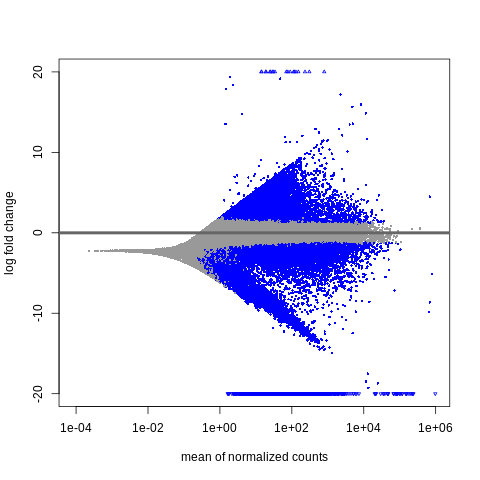

In [ ]:
%%R

plotMA(all_normal_result, ylim = c(-20, 20))

### AML vs non leukemia

In [ ]:
%%R

aml_normal_result <- results(dds_analysis, contrast = c("class", "AML", "non-leukemia"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(aml_normal_result)

log2 fold change (MLE): class AML vs non-leukemia 
Wald test p-value: class AML vs non.leukemia 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat     pvalue
               <numeric>      <numeric> <numeric>  <numeric>  <numeric>
5S_rRNA      7.27155e-02      -1.597806 1.4347026  -1.113684 0.37355202
5_8S_rRNA    8.17911e-02      -1.338395 1.2658031  -1.057349 0.42695254
7SK          2.17564e-03      -1.669502 5.4858641  -0.304328 0.76469884
A1BG         1.64004e+02      -1.278996 0.1184937 -10.793787 0.00927334
A1BG-AS1     1.51206e+02      -0.343341 0.0884092  -3.883543 1.00000000
...                  ...            ...       ...        ...        ...
ZZEF1         5149.38500       0.172971 0.0538847    3.21002   1.000000
ZZZ3          2200.99391       0.310355 0.0763569    4.06453   1.000000
hsa-mir-1253     0.00000             NA        NA         NA         NA
hsa-mir-423      0.00000             NA        NA         NA         NA

In [ ]:
%%R

summary(aml_normal_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 7142, 9.5%
LFC < -1.00 (down) : 4672, 6.2%
outliers [1]       : 0, 0%
low counts [2]     : 11608, 15%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

aml_normal_df <- as.data.frame(aml_normal_result)
head(aml_normal_df)

              baseMean log2FoldChange      lfcSE       stat      pvalue
5S_rRNA   7.271551e-02     -1.5978057 1.43470262  -1.113684 0.373552020
5_8S_rRNA 8.179106e-02     -1.3383951 1.26580311  -1.057349 0.426952540
7SK       2.175641e-03     -1.6695022 5.48586413  -0.304328 0.764698841
A1BG      1.640037e+02     -1.2789957 0.11849370 -10.793787 0.009273339
A1BG-AS1  1.512064e+02     -0.3433409 0.08840918  -3.883543 1.000000000
A1CF      6.070900e+00      0.2425271 0.23211550   1.044855 0.999449516
                padj
5S_rRNA           NA
5_8S_rRNA         NA
7SK               NA
A1BG      0.03944938
A1BG-AS1  1.00000000
A1CF      1.00000000


In [ ]:
%%R

aml_normal_p <- aml_normal_df[!is.na(aml_normal_df$padj) & aml_normal_df$padj < 0.001, ]
head(aml_normal_p)

           baseMean log2FoldChange     lfcSE      stat       pvalue
AADACP1    5.040871       3.746437 0.3197386  11.71719 4.362455e-18
AANAT     60.350306      -1.672240 0.1502276 -11.13138 3.823954e-06
AARSD1P1   5.046686       3.709741 0.2120375  17.49568 1.066719e-37
AASS     590.682793      -1.802121 0.1572755 -11.45837 1.697351e-07
AATK     348.801044      -2.575793 0.1791069 -14.38131 6.960336e-19
ABCA10    62.066586      -2.050415 0.1577671 -12.99647 1.387793e-11
                 padj
AADACP1  6.312998e-17
AANAT    2.422526e-05
AARSD1P1 4.131561e-36
AASS     1.205951e-06
AATK     1.050954e-17
ABCA10   1.332980e-10


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_aml_normal <- aml_normal_p[aml_normal_p$log2FoldChange > 1, ]
head(up_aml_normal)

           baseMean log2FoldChange     lfcSE      stat       pvalue
AADACP1    5.040871       3.746437 0.3197386 11.717186 4.362455e-18
AARSD1P1   5.046686       3.709741 0.2120375 17.495680 1.066719e-37
ABCF2P2    4.747466       2.181102 0.3127736  6.973422 7.961274e-05
ABHD17AP1 12.305861       4.204036 0.1943492 21.631352 2.313863e-61
ABHD17AP3 10.608421       2.605494 0.1834446 14.203168 1.048666e-18
ABHD17AP4  2.660967       2.807759 0.2167804 12.952094 3.741972e-17
                  padj
AADACP1   6.312998e-17
AARSD1P1  4.131561e-36
ABCF2P2   4.432527e-04
ABHD17AP1 2.329534e-59
ABHD17AP3 1.569925e-17
ABHD17AP4 5.136877e-16


In [ ]:
%%R

nrow(up_aml_normal)

[1] 7142


In [ ]:
%%R
up_gene_aml_normal <- rownames(up_aml_normal)

In [ ]:
%%R
length(up_gene_aml_normal)

[1] 7142


In [ ]:
%%R

for (gene in up_gene_aml_normal){
    lapply(gene, function(c){write(c, file = "upregulated_genes_aml_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated genes

In [ ]:
%%R
## downregulated gene
down_aml_normal <- aml_normal_p[aml_normal_p$log2FoldChange < -1, ]
head(down_aml_normal)

        baseMean log2FoldChange     lfcSE      stat       pvalue         padj
AANAT   60.35031      -1.672240 0.1502276 -11.13138 3.823954e-06 2.422526e-05
AASS   590.68279      -1.802121 0.1572755 -11.45837 1.697351e-07 1.205951e-06
AATK   348.80104      -2.575793 0.1791069 -14.38131 6.960336e-19 1.050954e-17
ABCA10  62.06659      -2.050415 0.1577671 -12.99647 1.387793e-11 1.332980e-10
ABCA6  859.07125      -2.555536 0.1894395 -13.48998 1.094465e-16 1.464049e-15
ABCB4  446.83242      -3.315820 0.1384992 -23.94107 4.622575e-63 4.978388e-61


In [ ]:
%%R
nrow(down_aml_normal)

[1] 4672


In [ ]:
%%R
down_gene_aml_normal <- rownames(down_aml_normal)

In [ ]:
%%R
length(down_gene_aml_normal)

[1] 4672


In [ ]:
%%R

for (gene in down_gene_aml_normal){
    lapply(gene, function(c){write(c, file = "downregulated_genes_aml_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

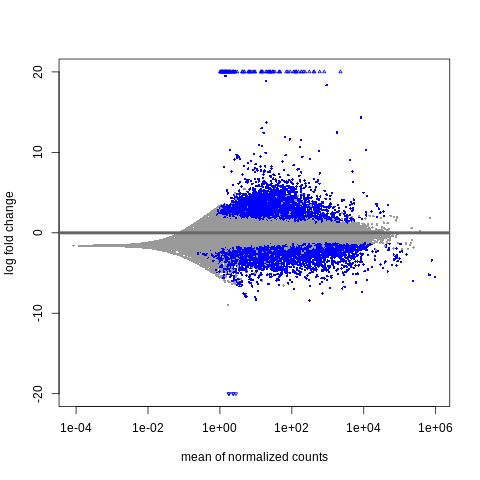

In [ ]:
%%R

plotMA(aml_normal_result, ylim = c(-20, 20))

### CLL vs non leukemia

In [ ]:
%%R

cll_normal_result <- results(dds_analysis, contrast = c("class", "CLL", "non-leukemia"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(cll_normal_result)

log2 fold change (MLE): class CLL vs non-leukemia 
Wald test p-value: class CLL vs non.leukemia 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat     pvalue
               <numeric>      <numeric> <numeric> <numeric>  <numeric>
5S_rRNA      7.27155e-02       0.000000 1.5204765  0.000000   1.000000
5_8S_rRNA    8.17911e-02       0.000000 1.3415530  0.000000   1.000000
7SK          2.17564e-03      -1.464715 5.8134950 -0.251951   0.803939
A1BG         1.64004e+02       0.120906 0.1253438  0.964594   1.000000
A1BG-AS1     1.51206e+02       0.640828 0.0933061  6.868018   0.999941
...                  ...            ...       ...       ...        ...
ZZEF1         5149.38500       0.251564 0.0570927   4.40624 1.00000000
ZZZ3          2200.99391       0.151827 0.0809034   1.87665 1.00000000
hsa-mir-1253     0.00000             NA        NA        NA         NA
hsa-mir-423      0.00000             NA        NA        NA         NA
snoZ196    

In [ ]:
%%R

summary(cll_normal_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 772, 1%
LFC < -1.00 (down) : 18297, 24%
outliers [1]       : 0, 0%
low counts [2]     : 7255, 9.7%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

cll_normal_df <- as.data.frame(cll_normal_result)
head(cll_normal_df)

              baseMean log2FoldChange      lfcSE       stat    pvalue padj
5S_rRNA   7.271551e-02      0.0000000 1.52047653  0.0000000 1.0000000   NA
5_8S_rRNA 8.179106e-02      0.0000000 1.34155302  0.0000000 1.0000000   NA
7SK       2.175641e-03     -1.4647153 5.81349496 -0.2519509 0.8039394   NA
A1BG      1.640037e+02      0.1209058 0.12534379  0.9645938 1.0000000    1
A1BG-AS1  1.512064e+02      0.6408282 0.09330613  6.8680177 0.9999408    1
A1CF      6.070900e+00      0.4447200 0.24459875  1.8181615 0.9884013    1


In [ ]:
%%R

cll_normal_p <- cll_normal_df[!is.na(cll_normal_df$padj) & cll_normal_df$padj < 0.001, ]
head(cll_normal_p)

         baseMean log2FoldChange     lfcSE       stat        pvalue
A2ML1   19.619328      -2.679937 0.1837762 -14.582614  3.087829e-20
A4GALT  95.934933      -6.056055 0.2180868 -27.769017 3.325864e-119
A4GNT    2.665314      -2.268532 0.3095350  -7.328838  2.082007e-05
AADAC    2.020643      -3.424988 0.3865563  -8.860256  1.767247e-10
AADACL4  3.908014      -2.619496 0.3907732  -6.703366  1.703991e-05
AADACP1  5.040871      -2.662450 0.3598361  -7.399064  1.918507e-06
                 padj
A2ML1    2.347840e-19
A4GALT  1.336646e-117
A4GNT    8.204735e-05
AADAC    9.475206e-10
AADACL4  6.760326e-05
AADACP1  8.178999e-06


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_cll_normal <- cll_normal_p[cll_normal_p$log2FoldChange > 1, ]
head(up_cll_normal)

             baseMean log2FoldChange     lfcSE     stat       pvalue
ABCA6      859.071249       3.394527 0.2004571 16.93393 3.433650e-33
ABCA9      445.443623       2.660203 0.2600475 10.22968 8.613063e-11
ABCA9-AS1    8.183209       3.127413 0.2919180 10.71332 1.576391e-13
ADAM28    2394.647348       1.588477 0.1516190 10.47677 5.195217e-05
ADAM29      68.855660       6.794414 0.3215218 21.13205 6.565523e-73
ADAMTS6    274.117931       2.706456 0.1191715 22.71059 8.286055e-47
                  padj
ABCA6     3.624236e-32
ABCA9     4.685880e-10
ABCA9-AS1 9.602066e-13
ADAM28    1.976764e-04
ADAM29    1.382969e-71
ADAMTS6   1.151051e-45


In [ ]:
%%R
nrow(up_cll_normal)

[1] 772


In [ ]:
%%R

up_gene_cll_normal <- rownames(up_cll_normal)

In [ ]:
%%R
length(up_gene_cll_normal)

[1] 772


In [ ]:
%%R

for (gene in up_gene_cll_normal){
    lapply(gene, function(c){write(c, file = "upregulated_genes_cll_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_cll_normal <- cll_normal_p[cll_normal_p$log2FoldChange < -1, ]
head(down_cll_normal)

         baseMean log2FoldChange     lfcSE       stat        pvalue
A2ML1   19.619328      -2.679937 0.1837762 -14.582614  3.087829e-20
A4GALT  95.934933      -6.056055 0.2180868 -27.769017 3.325864e-119
A4GNT    2.665314      -2.268532 0.3095350  -7.328838  2.082007e-05
AADAC    2.020643      -3.424988 0.3865563  -8.860256  1.767247e-10
AADACL4  3.908014      -2.619496 0.3907732  -6.703366  1.703991e-05
AADACP1  5.040871      -2.662450 0.3598361  -7.399064  1.918507e-06
                 padj
A2ML1    2.347840e-19
A4GALT  1.336646e-117
A4GNT    8.204735e-05
AADAC    9.475206e-10
AADACL4  6.760326e-05
AADACP1  8.178999e-06


In [ ]:
%%R
nrow(down_cll_normal)

[1] 18297


In [ ]:
%%R
down_gene_cll_normal <- rownames(down_cll_normal)

In [ ]:
%%R
length(down_gene_cll_normal)

[1] 18297


In [ ]:
%%R

for (gene in down_gene_cll_normal){
    lapply(gene, function(c){write(c, file = "downregulated_genes_cll_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

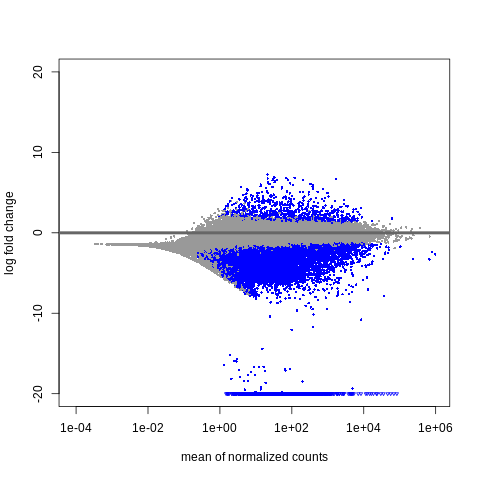

In [ ]:
%%R

plotMA(cll_normal_result, ylim = c(-20, 20))

### CML vs non leukemia

In [ ]:
%%R

cml_normal_result <- results(dds_analysis, contrast = c("class", "CML", "non-leukemia"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(cml_normal_result)

log2 fold change (MLE): class CML vs non-leukemia 
Wald test p-value: class CML vs non.leukemia 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat    pvalue
               <numeric>      <numeric> <numeric>  <numeric> <numeric>
5S_rRNA      7.27155e-02       0.000000  1.715187  0.0000000 1.0000000
5_8S_rRNA    8.17911e-02       0.000000  1.513363  0.0000000 1.0000000
7SK          2.17564e-03      -0.466056  6.557786 -0.0710691 0.9439966
A1BG         1.64004e+02      -1.216658  0.142025 -8.5665077 0.0635684
A1BG-AS1     1.51206e+02      -0.895635  0.106772 -8.3882861 0.8358281
...                  ...            ...       ...        ...       ...
ZZEF1         5149.38500      0.4619574 0.0644044   7.172757   1.00000
ZZZ3          2200.99391      0.0322245 0.0913001   0.352951   1.00000
hsa-mir-1253     0.00000             NA        NA         NA        NA
hsa-mir-423      0.00000             NA        NA         NA        NA
snoZ196    

In [ ]:
%%R

summary(cml_normal_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 661, 0.88%
LFC < -1.00 (down) : 9047, 12%
outliers [1]       : 0, 0%
low counts [2]     : 14510, 19%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

cml_normal_df <- as.data.frame(cml_normal_result)
head(cml_normal_df)

              baseMean log2FoldChange     lfcSE        stat     pvalue
5S_rRNA   7.271551e-02      0.0000000 1.7151867  0.00000000 1.00000000
5_8S_rRNA 8.179106e-02      0.0000000 1.5133628  0.00000000 1.00000000
7SK       2.175641e-03     -0.4660557 6.5577856 -0.07106907 0.94399661
A1BG      1.640037e+02     -1.2166577 0.1420249 -8.56650771 0.06356837
A1BG-AS1  1.512064e+02     -0.8956350 0.1067721 -8.38828612 0.83582811
A1CF      6.070900e+00     -1.0749816 0.2949952 -3.64406417 0.39967861
               padj
5S_rRNA          NA
5_8S_rRNA        NA
7SK              NA
A1BG      0.2464901
A1BG-AS1  1.0000000
A1CF      1.0000000


In [ ]:
%%R

cml_normal_p <- cml_normal_df[!is.na(cml_normal_df$padj) & cml_normal_df$padj < 0.001, ]
head(cml_normal_p)

         baseMean log2FoldChange     lfcSE       stat       pvalue         padj
ABCA10   62.06659      -1.850526 0.1894457  -9.768107 3.568697e-06 2.645827e-05
ABCA12   24.59330      -3.328905 0.2425603 -13.724032 3.945377e-22 7.184914e-21
ABCA13 2140.12845       4.146493 0.2743134  15.115899 9.286343e-31 2.279115e-29
ABCA6   859.07125      -2.348143 0.2268436 -10.351376 1.398823e-09 1.360194e-08
ABCA9   445.44362      -2.411496 0.2942473  -8.195474 8.054111e-07 6.307175e-06
ABCB1   398.60565      -1.959556 0.1776351 -11.031360 3.298026e-08 2.903263e-07


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_cml_normal <- cml_normal_p[cml_normal_p$log2FoldChange > 1, ]
head(up_cml_normal)

               baseMean log2FoldChange     lfcSE     stat       pvalue
ABCA13      2140.128447       4.146493 0.2743134 15.11590 9.286343e-31
ABHD5       1359.275653       1.405806 0.1072220 13.11117 7.693976e-05
ACTN1-AS1      6.545485       3.423575 0.2715543 12.60733 2.232002e-19
ADAM9       1099.794098       2.110751 0.1302166 16.20954 7.315794e-18
ADAMTS14      79.925159       2.292041 0.2089997 10.96672 3.164281e-10
ADORA2A-AS1  157.005541       1.757918 0.1434448 12.25501 6.330371e-08
                    padj
ABCA13      2.279115e-29
ABHD5       4.978058e-04
ACTN1-AS1   3.630323e-18
ADAM9       1.113755e-16
ADAMTS14    3.217746e-09
ADORA2A-AS1 5.471411e-07


In [ ]:
%%R

nrow(up_cml_normal)

[1] 661


In [ ]:
%%R

up_gene_cml_normal <- rownames(up_cml_normal)

In [ ]:
%%R
length(up_gene_cml_normal)

[1] 661


In [ ]:
%%R

for (gene in up_gene_cml_normal){
    lapply(gene, function(c){write(c, file = "upregulated_genes_cml_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

####downregulated

In [ ]:
%%R
## downregulated gene
down_cml_normal <- cml_normal_p[cml_normal_p$log2FoldChange < -1, ]
head(down_cml_normal)

        baseMean log2FoldChange     lfcSE       stat       pvalue         padj
ABCA10  62.06659      -1.850526 0.1894457  -9.768107 3.568697e-06 2.645827e-05
ABCA12  24.59330      -3.328905 0.2425603 -13.724032 3.945377e-22 7.184914e-21
ABCA6  859.07125      -2.348143 0.2268436 -10.351376 1.398823e-09 1.360194e-08
ABCA9  445.44362      -2.411496 0.2942473  -8.195474 8.054111e-07 6.307175e-06
ABCB1  398.60565      -1.959556 0.1776351 -11.031360 3.298026e-08 2.903263e-07
ABCB4  446.83242      -2.879598 0.1662883 -17.316900 6.322588e-30 1.508235e-28


In [ ]:
%%R
nrow(down_cml_normal)

[1] 9047


In [ ]:
%%R
down_gene_cml_normal <- rownames(down_cml_normal)

In [ ]:
%%R
length(down_gene_cml_normal)

[1] 9047


In [ ]:
%%R

for (gene in down_gene_cml_normal){
    lapply(gene, function(c){write(c, file = "downregulated_genes_cml_non-leukemia.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

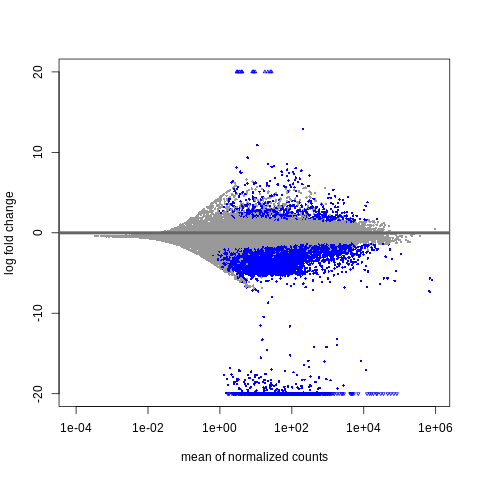

In [ ]:
%%R

plotMA(cml_normal_result, ylim = c(-20, 20))

### ALL vs AML

In [ ]:
%%R

all_aml_result <- results(dds_analysis, contrast = c("class", "ALL", "AML"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(all_aml_result)

log2 fold change (MLE): class ALL vs AML 
Wald test p-value: class ALL vs AML 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat    pvalue      padj
               <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
5S_rRNA      7.27155e-02      -0.191960 1.0527219 -0.182347  0.907391         1
5_8S_rRNA    8.17911e-02      -0.674900 0.9288373 -0.726607  0.672510         1
7SK          2.17564e-03      -0.611513 4.0244611 -0.151949  0.882871         1
A1BG         1.64004e+02      -0.705538 0.0867552 -8.132511  0.999656         1
A1BG-AS1     1.51206e+02       0.568817 0.0638861  8.903613  1.000000         1
...                  ...            ...       ...       ...       ...       ...
ZZEF1         5149.38500       0.253288 0.0394614   6.41861  1.000000         1
ZZZ3          2200.99391       0.719875 0.0558714  12.88450  1.000000         1
hsa-mir-1253     0.00000             NA        NA        NA        NA        NA
h

In [ ]:
%%R

summary(all_aml_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 12703, 17%
LFC < -1.00 (down) : 13989, 19%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

all_aml_df <- as.data.frame(all_aml_result)
head(all_aml_df)

              baseMean log2FoldChange      lfcSE       stat    pvalue padj
5S_rRNA   7.271551e-02     -0.1919603 1.05272189 -0.1823467 0.9073907    1
5_8S_rRNA 8.179106e-02     -0.6748996 0.92883735 -0.7266068 0.6725103    1
7SK       2.175641e-03     -0.6115126 4.02446107 -0.1519489 0.8828709    1
A1BG      1.640037e+02     -0.7055378 0.08675523 -8.1325108 0.9996558    1
A1BG-AS1  1.512064e+02      0.5688168 0.06388606  8.9036135 1.0000000    1
A1CF      6.070900e+00      0.5893324 0.16075573  3.6660115 0.9946846    1


In [ ]:
%%R

all_aml_p <- all_aml_df[!is.na(all_aml_df$padj) & all_aml_df$padj < 0.001, ]
head(all_aml_p)

          baseMean log2FoldChange      lfcSE      stat        pvalue
AADACL4   3.908014       3.650563 0.26207189  13.92963  2.397381e-24
AADACP1   5.040871      -3.524255 0.22151187 -15.91001  2.199574e-30
AAED1    29.244706     -29.063722 0.92524236 -31.41201 2.222860e-202
AAMDC   123.359897      -1.530470 0.05018208 -30.49835  2.032554e-26
AARS     79.794975     -30.327479 0.80629930 -37.61318 5.701024e-290
AARSD1  170.716855      -2.745072 0.08005836 -34.28839 1.225239e-105
                 padj
AADACL4  1.243909e-23
AADACP1  1.259151e-29
AAED1   4.887553e-201
AAMDC    1.092593e-25
AARS    1.965948e-288
AARSD1  1.473946e-104


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_all_aml <- all_aml_p[all_aml_p$log2FoldChange > 1, ]
head(up_all_aml)

            baseMean log2FoldChange      lfcSE     stat       pvalue
AADACL4     3.908014       3.650563 0.26207189 13.92963 2.397381e-24
AASS      590.682793       2.801243 0.11527164 24.30123 2.418539e-55
ABCA1    4072.068025       1.419050 0.09428866 15.05006 4.408319e-06
ABCA4      83.921096       3.935062 0.15960576 24.65489 7.979788e-76
ABCB10P1    1.631733       2.051533 0.15962608 12.85211 2.236862e-11
ABCB10P3    1.073570       2.525032 0.15828210 15.95273 2.847404e-22
                 padj
AADACL4  1.243909e-23
AASS     1.888411e-54
ABCA1    1.381280e-05
ABCA4    7.557601e-75
ABCB10P1 8.634266e-11
ABCB10P3 1.418289e-21


In [ ]:
%%R

nrow(up_all_aml)

[1] 12703


In [ ]:
%%R

up_gene_all_aml <- rownames(up_all_aml)

In [ ]:
%%R
length(up_gene_all_aml)

[1] 12703


In [ ]:
%%R

for (gene in up_gene_all_aml){
    lapply(gene, function(c){write(c, file = "upregulated_genes_all_aml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_all_aml <- all_aml_p[all_aml_p$log2FoldChange < -1, ]
head(down_all_aml)

          baseMean log2FoldChange      lfcSE      stat        pvalue
AADACP1   5.040871      -3.524255 0.22151187 -15.91001  2.199574e-30
AAED1    29.244706     -29.063722 0.92524236 -31.41201 2.222860e-202
AAMDC   123.359897      -1.530470 0.05018208 -30.49835  2.032554e-26
AARS     79.794975     -30.327479 0.80629930 -37.61318 5.701024e-290
AARSD1  170.716855      -2.745072 0.08005836 -34.28839 1.225239e-105
AATK    348.801044      -1.486174 0.13144638 -11.30632  1.083746e-04
                 padj
AADACP1  1.259151e-29
AAED1   4.887553e-201
AAMDC    1.092593e-25
AARS    1.965948e-288
AARSD1  1.473946e-104
AATK     3.146920e-04


In [ ]:
%%R

nrow(down_all_aml)

[1] 13989


In [ ]:
%%R

down_gene_all_aml <- rownames(down_all_aml)

In [ ]:
%%R
length(down_gene_all_aml)

[1] 13989


In [ ]:
%%R

for (gene in down_gene_all_aml){
    lapply(gene, function(c){write(c, file = "downregulated_genes_all_aml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

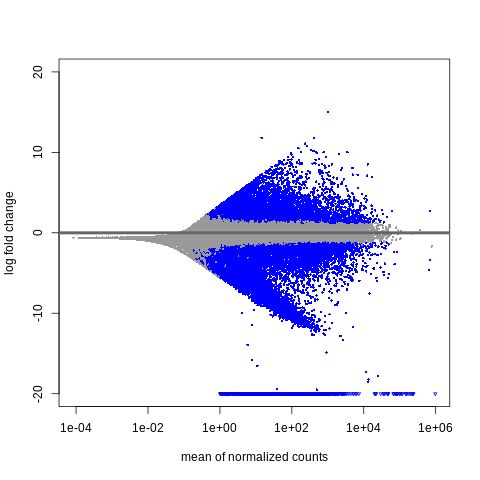

In [ ]:
%%R

plotMA(all_aml_result, ylim = c(-20, 20))

### ALL vs CLL

In [ ]:
%%R

all_cll_result <- results(dds_analysis, contrast = c("class", "ALL", "CLL"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(all_cll_result)

log2 fold change (MLE): class ALL vs CLL 
Wald test p-value: class ALL vs CLL 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE       stat      pvalue
               <numeric>      <numeric> <numeric>  <numeric>   <numeric>
5S_rRNA      7.27155e-02      -0.377922 1.1669198  -0.323863 8.21853e-01
5_8S_rRNA    8.17911e-02      -0.602015 1.0296827  -0.584661 7.10315e-01
7SK          2.17564e-03      -0.816299 4.4607817  -0.182995 8.58366e-01
A1BG         1.64004e+02      -2.105439 0.0958998 -21.954565 4.82121e-31
A1BG-AS1     1.51206e+02      -0.415352 0.0705073  -5.890911 1.00000e+00
...                  ...            ...       ...        ...         ...
ZZEF1         5149.38500       0.174694 0.0437404    3.99389 1.00000e+00
ZZZ3          2200.99391       0.878403 0.0619404   14.18143 9.75185e-01
hsa-mir-1253     0.00000             NA        NA         NA          NA
hsa-mir-423      0.00000             NA        NA         NA          NA
snoZ1

In [ ]:
%%R

summary(all_cll_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 26172, 35%
LFC < -1.00 (down) : 11126, 15%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

all_cll_df <- as.data.frame(all_cll_result)
head(all_cll_df)

              baseMean log2FoldChange      lfcSE        stat       pvalue
5S_rRNA   7.271551e-02     -0.3779225 1.16691983  -0.3238633 8.218527e-01
5_8S_rRNA 8.179106e-02     -0.6020154 1.02968274  -0.5846611 7.103150e-01
7SK       2.175641e-03     -0.8162995 4.46078172  -0.1829947 8.583656e-01
A1BG      1.640037e+02     -2.1054394 0.09589984 -21.9545654 4.821214e-31
A1BG-AS1  1.512064e+02     -0.4153522 0.07050730  -5.8909108 1.000000e+00
A1CF      6.070900e+00      0.3871394 0.17830690   2.1711971 9.997060e-01
                  padj
5S_rRNA   1.000000e+00
5_8S_rRNA 1.000000e+00
7SK       1.000000e+00
A1BG      1.521918e-30
A1BG-AS1  1.000000e+00
A1CF      1.000000e+00


In [ ]:
%%R

all_cll_p <- all_cll_df[!is.na(all_cll_df$padj) & all_cll_df$padj < 0.001, ]
head(all_cll_p)

          baseMean log2FoldChange      lfcSE       stat       pvalue
A1BG    164.003650      -2.105439 0.09589984 -21.954565 4.821214e-31
A2ML1    19.619328       2.821986 0.14225816  19.837076 7.432843e-38
A3GALT2  14.457594       1.737691 0.12020330  14.456271 4.203888e-10
A4GALT   95.934933       4.484017 0.17172834  26.111109 8.213851e-92
A4GNT     2.665314       1.857562 0.23860567   7.785069 1.627865e-04
AADAC     2.020643       2.860364 0.29960323   9.547174 2.658917e-10
                padj
A1BG    1.521918e-30
A2ML1   2.502798e-37
A3GALT2 9.986815e-10
A4GALT  3.995694e-91
A4GNT   3.330215e-04
AADAC   6.341893e-10


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_all_cll <- all_cll_p[all_cll_p$log2FoldChange > 1, ]
head(up_all_cll)

         baseMean log2FoldChange     lfcSE      stat       pvalue         padj
A2ML1   19.619328       2.821986 0.1422582 19.837076 7.432843e-38 2.502798e-37
A3GALT2 14.457594       1.737691 0.1202033 14.456271 4.203888e-10 9.986815e-10
A4GALT  95.934933       4.484017 0.1717283 26.111109 8.213851e-92 3.995694e-91
A4GNT    2.665314       1.857562 0.2386057  7.785069 1.627865e-04 3.330215e-04
AADAC    2.020643       2.860364 0.2996032  9.547174 2.658917e-10 6.341893e-10
AADACL2  2.793279       2.016630 0.2416566  8.345025 1.294369e-05 2.748669e-05


In [ ]:
%%R

nrow(up_all_cll)

[1] 26172


In [ ]:
%%R

up_gene_all_cll <- rownames(up_all_cll)

In [ ]:
%%R
length(up_gene_all_cll)

[1] 26172


In [ ]:
%%R

for (gene in up_gene_all_cll){
    lapply(gene, function(c){write(c, file = "upregulated_genes_all_cll.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_all_cll <- all_cll_p[all_cll_p$log2FoldChange < -1, ]
head(down_all_cll)

         baseMean log2FoldChange      lfcSE      stat        pvalue
A1BG    164.00365      -2.105439 0.09589984 -21.95457  4.821214e-31
AARSD1  170.71685      -3.407480 0.08859763 -38.46017 6.737775e-163
ABALON  270.37245      -3.911212 0.12966306 -30.16443 6.098668e-112
ABCA10   62.06659      -2.390226 0.12779386 -18.70376  7.284412e-28
ABCA11P  83.64763      -4.637569 0.08893732 -52.14424  0.000000e+00
ABCA5   588.69978      -2.556608 0.09373079 -27.27608  3.089407e-62
                 padj
A1BG     1.521918e-30
AARSD1  4.813045e-162
ABALON  3.315661e-111
ABCA10   2.225416e-27
ABCA11P  0.000000e+00
ABCA5    1.250481e-61


In [ ]:
%%R

nrow(down_all_cll)

[1] 11126


In [ ]:
%%R

down_gene_all_cll <- rownames(down_all_cll)

In [ ]:
%%R
length(down_gene_all_cll)

[1] 11126


In [ ]:
%%R

for (gene in down_gene_all_cll){
    lapply(gene, function(c){write(c, file = "downregulated_genes_all_cll.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

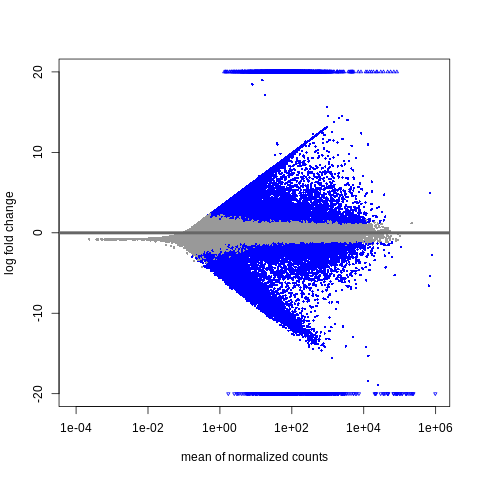

In [ ]:
%%R

plotMA(all_cll_result, ylim = c(-20, 20))

### ALL vs CML

In [ ]:
%%R

all_cml_result <- results(dds_analysis, contrast = c("class", "ALL", "CML"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R

print(all_cml_result)

log2 fold change (MLE): class ALL vs CML 
Wald test p-value: class ALL vs CML 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
5S_rRNA      7.27155e-02      -1.376446  1.411284 -0.975315   0.4409361
5_8S_rRNA    8.17911e-02      -1.600494  1.245292 -1.285237   0.3332149
7SK          2.17564e-03      -1.814959  5.395097 -0.336409   0.7408838
A1BG         1.64004e+02      -0.767876  0.116862 -6.570774   0.9765003
A1BG-AS1     1.51206e+02       1.121111  0.087553 12.804939   0.0832884
...                  ...            ...       ...       ...         ...
ZZEF1         5149.38500     -0.0356987  0.052930 -0.674452 1.00000e+00
ZZZ3          2200.99391      0.9980059  0.075013 13.304438 5.10604e-01
hsa-mir-1253     0.00000             NA        NA        NA          NA
hsa-mir-423      0.00000             NA        NA        NA          NA
snoZ196          

In [ ]:
%%R

summary(all_cml_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 19390, 26%
LFC < -1.00 (down) : 12197, 16%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

all_cml_df <- as.data.frame(all_cml_result)
head(all_cml_df)

              baseMean log2FoldChange      lfcSE       stat       pvalue
5S_rRNA   7.271551e-02     -1.3764460 1.41128369 -0.9753149 4.409361e-01
5_8S_rRNA 8.179106e-02     -1.6004942 1.24529153 -1.2852366 3.332149e-01
7SK       2.175641e-03     -1.8149591 5.39509677 -0.3364090 7.408838e-01
A1BG      1.640037e+02     -0.7678758 0.11686230 -6.5707743 9.765003e-01
A1BG-AS1  1.512064e+02      1.1211110 0.08755301 12.8049390 8.328841e-02
A1CF      6.070900e+00      1.9068411 0.24287240  7.8512054 9.429979e-05
                  padj
5S_rRNA   0.6963205476
5_8S_rRNA 0.5668359860
7SK       1.0000000000
A1BG      1.0000000000
A1BG-AS1  0.1646824016
A1CF      0.0002309839


In [ ]:
%%R

all_cml_p <- all_cml_df[!is.na(all_cml_df$padj) & all_cml_df$padj < 0.001, ]
head(all_cml_p)

         baseMean log2FoldChange     lfcSE       stat        pvalue
A1CF     6.070900       1.906841 0.2428724   7.851205  9.429979e-05
A4GALT  95.934933      -2.301600 0.1936190 -11.887263  8.932871e-12
A4GNT    2.665314      -2.194744 0.2578521  -8.511636  1.798153e-06
AADACL2  2.793279       2.103392 0.3038686   6.922045  1.410812e-04
AADACL4  3.908014       3.585880 0.3631771   9.873642  5.389923e-13
AAED1   29.244706     -30.841227 1.2388607 -24.894831 1.684353e-128
                 padj
A1CF     2.309839e-04
A4GALT   2.713979e-11
A4GNT    4.716233e-06
AADACL2  3.425501e-04
AADACL4  1.682308e-12
AAED1   1.813960e-127


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_all_cml <- all_cml_p[all_cml_p$log2FoldChange > 1, ]
head(up_all_cml)

                 baseMean log2FoldChange     lfcSE      stat       pvalue
A1CF             6.070900       1.906841 0.2428724  7.851205 9.429979e-05
AADACL2          2.793279       2.103392 0.3038686  6.922045 1.410812e-04
AADACL4          3.908014       3.585880 0.3631771  9.873642 5.389923e-13
AARSD1P1         5.046686       4.214245 0.2271760 18.550573 9.512090e-46
AASS           590.682793       2.143963 0.1547118 13.857786 7.115496e-14
ABBA01000935.2   1.144645       2.133756 0.2865833  7.445498 3.808985e-05
                       padj
A1CF           2.309839e-04
AADACL2        3.425501e-04
AADACL4        1.682308e-12
AARSD1P1       4.678562e-45
AASS           2.256231e-13
ABBA01000935.2 9.490987e-05


In [ ]:
%%R
nrow(up_all_cml)

[1] 19390


In [ ]:
%%R
up_gene_all_cml <- rownames(up_all_cml)

In [ ]:
%%R
length(up_gene_all_cml)

[1] 19390


In [ ]:
%%R

for (gene in up_gene_all_cml){
    lapply(gene, function(c){write(c, file = "upregulated_genes_all_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

####Downregulated

In [ ]:
%%R
## downregulated gene
down_all_cml <- all_cml_p[all_cml_p$log2FoldChange < -1, ]
head(down_all_cml)

         baseMean log2FoldChange      lfcSE       stat        pvalue
A4GALT  95.934933      -2.301600 0.19361898 -11.887263  8.932871e-12
A4GNT    2.665314      -2.194744 0.25785215  -8.511636  1.798153e-06
AAED1   29.244706     -30.841227 1.23886066 -24.894831 1.684353e-128
AAMDC  123.359897      -1.436228 0.06807053 -21.099123  7.348985e-11
AARS    79.794975     -30.030352 1.07930003 -27.823914 1.178146e-159
AARSD1 170.716855      -2.892705 0.10752697 -26.902134  1.185911e-69
                padj
A4GALT  2.713979e-11
A4GNT   4.716233e-06
AAED1  1.813960e-127
AAMDC   2.186488e-10
AARS   1.666664e-158
AARSD1  7.468905e-69


In [ ]:
%%R

nrow(down_all_cml)

[1] 12197


In [ ]:
%%R

down_gene_all_cml <- rownames(down_all_cml)

In [ ]:
%%R
length(down_gene_all_cml)

[1] 12197


In [ ]:
%%R

for (gene in down_gene_all_cml){
    lapply(gene, function(c){write(c, file = "downregulated_genes_all_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

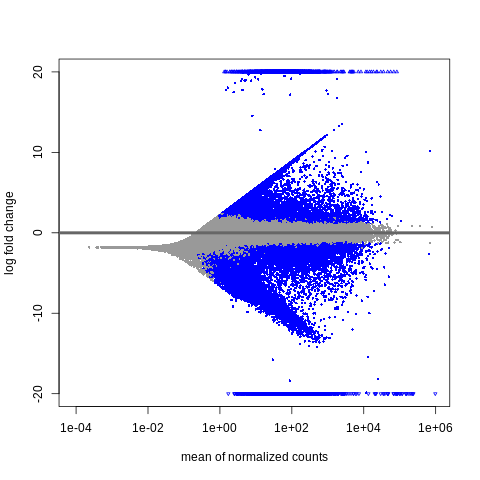

In [ ]:
%%R

plotMA(all_cml_result, ylim = c(-20, 20))

### AML vs CML

In [ ]:
%%R

aml_cml_result <- results(dds_analysis, contrast = c("class", "AML", "CML"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R
print(aml_cml_result)

log2 fold change (MLE): class AML vs CML 
Wald test p-value: class AML vs CML 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat     pvalue
               <numeric>      <numeric> <numeric> <numeric>  <numeric>
5S_rRNA      7.27155e-02      -1.184486 1.5885131 -0.745657   0.538310
5_8S_rRNA    8.17911e-02      -0.925595 1.4016259 -0.660372   0.605915
7SK          2.17564e-03       0.000000 6.0727237  0.000000   1.000000
A1BG         1.64004e+02      -0.062338 0.1314341 -0.474291   1.000000
A1BG-AS1     1.51206e+02       0.552294 0.0982405  5.621860   0.999997
...                  ...            ...       ...       ...        ...
ZZEF1         5149.38500      -0.288986 0.0595764  -4.85069 1.00000000
ZZZ3          2200.99391       0.278130 0.0844196   3.29462 1.00000000
hsa-mir-1253     0.00000             NA        NA        NA         NA
hsa-mir-423      0.00000             NA        NA        NA         NA
snoZ196          1.39877     

In [ ]:
%%R
summary(aml_cml_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 13326, 18%
LFC < -1.00 (down) : 1803, 2.4%
outliers [1]       : 0, 0%
low counts [2]     : 8706, 12%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

aml_cml_df <- as.data.frame(aml_cml_result)
head(aml_cml_df)

              baseMean log2FoldChange      lfcSE       stat    pvalue      padj
5S_rRNA   7.271551e-02    -1.18448573 1.58851305 -0.7456569 0.5383102        NA
5_8S_rRNA 8.179106e-02    -0.92559465 1.40162590 -0.6603721 0.6059153        NA
7SK       2.175641e-03     0.00000000 6.07272366  0.0000000 1.0000000        NA
A1BG      1.640037e+02    -0.06233796 0.13143405 -0.4742908 1.0000000 1.0000000
A1BG-AS1  1.512064e+02     0.55229416 0.09824046  5.6218602 0.9999974 1.0000000
A1CF      6.070900e+00     1.31750872 0.26822127  4.9120217 0.1182547 0.3649475


In [ ]:
%%R

aml_cml_p <- aml_cml_df[!is.na(aml_cml_df$padj) & aml_cml_df$padj < 0.001, ]
head(aml_cml_p)

          baseMean log2FoldChange     lfcSE       stat       pvalue
A2ML1    19.619328       1.782891 0.1811902   9.839887 7.772343e-06
A3GALT2  14.457594      -1.872139 0.1553776 -12.048962 9.940803e-09
AADAC     2.020643       2.777198 0.4032986   6.886209 5.248927e-06
AADACL2   2.793279       2.926290 0.3332247   8.781733 3.718316e-09
AADACP1   5.040871       4.406376 0.3643135  12.095009 4.377386e-21
AARSD1P1  5.046686       4.054813 0.2432528  16.669132 1.792368e-36
                 padj
A2ML1    3.778235e-05
A3GALT2  5.568464e-08
AADAC    2.575770e-05
AADACL2  2.120525e-08
AADACP1  3.613881e-20
AARSD1P1 2.130383e-35


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_aml_cml <- aml_cml_p[aml_cml_p$log2FoldChange > 1, ]
head(up_aml_cml)

          baseMean log2FoldChange     lfcSE      stat       pvalue         padj
A2ML1    19.619328       1.782891 0.1811902  9.839887 7.772343e-06 3.778235e-05
AADAC     2.020643       2.777198 0.4032986  6.886209 5.248927e-06 2.575770e-05
AADACL2   2.793279       2.926290 0.3332247  8.781733 3.718316e-09 2.120525e-08
AADACP1   5.040871       4.406376 0.3643135 12.095009 4.377386e-21 3.613881e-20
AARSD1P1  5.046686       4.054813 0.2432528 16.669132 1.792368e-36 2.130383e-35
ABCA12   24.593296       3.590482 0.2258607 15.896891 9.399815e-31 9.820649e-30


In [ ]:
%%R
nrow(up_aml_cml)

[1] 13326


In [ ]:
%%R
up_gene_aml_cml <- rownames(up_aml_cml)

In [ ]:
%%R
length(up_gene_aml_cml)

[1] 13326


In [ ]:
%%R

for (gene in up_gene_aml_cml){
    lapply(gene, function(c){write(c, file = "upregulated_genes_aml_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_aml_cml <- aml_cml_p[aml_cml_p$log2FoldChange < -1, ]
head(down_aml_cml)

          baseMean log2FoldChange      lfcSE       stat       pvalue
A3GALT2   14.45759      -1.872139 0.15537760 -12.048962 9.940803e-09
ABCA13  2140.12845      -4.685002 0.25395210 -18.448367 5.189199e-48
ABCC3    156.00500      -1.778467 0.19864573  -8.952956 4.448275e-05
ABHD5   1359.27565      -2.082875 0.09922165 -20.992143 4.957018e-28
ABLIM3    47.38621      -1.970233 0.24879966  -7.918954 4.816478e-05
ACSL1   5068.20633      -1.724771 0.14108314 -12.225207 1.394398e-07
                padj
A3GALT2 5.568464e-08
ABCA13  7.650719e-47
ABCC3   2.054253e-04
ABHD5   4.856411e-27
ABLIM3  2.217951e-04
ACSL1   7.439034e-07


In [ ]:
%%R
nrow(down_aml_cml)

[1] 1803


In [ ]:
%%R
down_gene_aml_cml <- rownames(down_aml_cml)

In [ ]:
%%R
length(down_gene_aml_cml)

[1] 1803


In [ ]:
%%R

for (gene in down_gene_aml_cml){
    lapply(gene, function(c){write(c, file = "downregulated_genes_aml_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

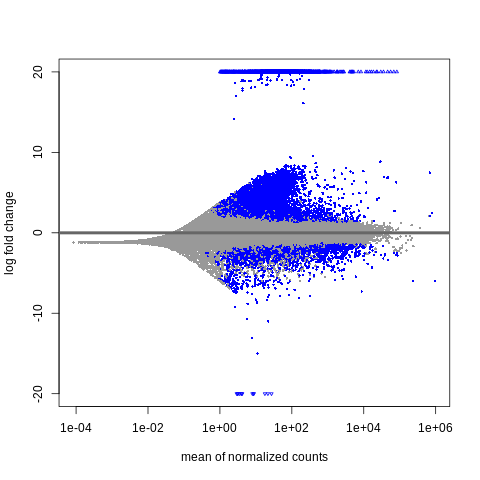

In [ ]:
%%R

plotMA(aml_cml_result, ylim = c(-20, 20))

### AML vs CLL

In [ ]:
%%R

aml_cll_result <- results(dds_analysis, contrast = c("class", "AML", "CLL"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R
print(aml_cll_result)

log2 fold change (MLE): class AML vs CLL 
Wald test p-value: class AML vs CLL 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE        stat     pvalue
               <numeric>      <numeric> <numeric>   <numeric>  <numeric>
5S_rRNA      7.27155e-02     -0.1859621 1.3759920  -0.1351477 0.91731335
5_8S_rRNA    8.17911e-02      0.0728841 1.2141049   0.0600312 0.96588703
7SK          2.17564e-03      0.0000000 5.2601784   0.0000000 1.00000000
A1BG         1.64004e+02     -1.3999015 0.1132029 -12.3663064 0.00020574
A1BG-AS1     1.51206e+02     -0.9841690 0.0834083 -11.7994185 0.57526746
...                  ...            ...       ...         ...        ...
ZZEF1         5149.38500     -0.0785932 0.0515848    -1.52357 1.0000e+00
ZZZ3          2200.99391      0.1585274 0.0730501     2.17012 1.0000e+00
hsa-mir-1253     0.00000             NA        NA          NA         NA
hsa-mir-423      0.00000             NA        NA          NA         NA
snoZ1

In [ ]:
%%R
summary(aml_cll_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 21131, 28%
LFC < -1.00 (down) : 3257, 4.3%
outliers [1]       : 0, 0%
low counts [2]     : 4353, 5.8%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

aml_cll_df <- as.data.frame(aml_cll_result)
head(aml_cll_df)

              baseMean log2FoldChange      lfcSE         stat       pvalue
5S_rRNA   7.271551e-02    -0.18596214 1.37599199  -0.13514769 0.9173133503
5_8S_rRNA 8.179106e-02     0.07288412 1.21410490   0.06003116 0.9658870260
7SK       2.175641e-03     0.00000000 5.26017843   0.00000000 1.0000000000
A1BG      1.640037e+02    -1.39990155 0.11320288 -12.36630637 0.0002057401
A1BG-AS1  1.512064e+02    -0.98416903 0.08340827 -11.79941847 0.5752674565
A1CF      6.070900e+00    -0.20219292 0.21153960  -0.95581595 0.9999188497
                 padj
5S_rRNA   1.000000000
5_8S_rRNA 1.000000000
7SK                NA
A1BG      0.000603096
A1BG-AS1  1.000000000
A1CF      1.000000000


In [ ]:
%%R

aml_cll_p <- aml_cll_df[!is.na(aml_cll_df$padj) & aml_cll_df$padj < 0.001, ]
head(aml_cll_p)

          baseMean log2FoldChange     lfcSE       stat       pvalue
A1BG    164.003650      -1.399902 0.1132029 -12.366306 2.057401e-04
A2ML1    19.619328       4.005308 0.1631580  24.548654 4.571830e-76
A4GALT   95.934933       5.194765 0.1988051  26.129940 3.986285e-99
A4GNT     2.665314       2.383618 0.2744313   8.685664 2.306302e-07
AADAC     2.020643       3.748034 0.3456108  10.844666 9.232861e-16
AADACL2   2.793279       2.839528 0.2776697  10.226280 1.737665e-11
                padj
A1BG    6.030960e-04
A2ML1   4.110628e-75
A4GALT  4.603338e-98
A4GNT   7.731598e-07
AADAC   3.859200e-15
AADACL2 6.585025e-11


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_aml_cll <- aml_cll_p[aml_cll_p$log2FoldChange > 1, ]
head(up_aml_cll)

             baseMean log2FoldChange     lfcSE      stat       pvalue
A2ML1       19.619328       4.005308 0.1631580 24.548654 4.571830e-76
A4GALT      95.934933       5.194765 0.1988051 26.129940 3.986285e-99
A4GNT        2.665314       2.383618 0.2744313  8.685664 2.306302e-07
AADAC        2.020643       3.748034 0.3456108 10.844666 9.232861e-16
AADACL2      2.793279       2.839528 0.2776697 10.226280 1.737665e-11
AADACL2-AS1  1.221153       3.211163 0.3152544 10.185939 1.158838e-12
                    padj
A2ML1       4.110628e-75
A4GALT      4.603338e-98
A4GNT       7.731598e-07
AADAC       3.859200e-15
AADACL2     6.585025e-11
AADACL2-AS1 4.519140e-12


In [ ]:
%%R
nrow(up_aml_cll)

[1] 21131


In [ ]:
%%R
up_gene_aml_cll <- rownames(up_aml_cll)

In [ ]:
%%R
length(up_gene_aml_cll)

[1] 21131


In [ ]:
%%R

for (gene in up_gene_aml_cll){
    lapply(gene, function(c){write(c, file = "upregulated_genes_aml_cll.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_aml_cll <- aml_cll_p[aml_cll_p$log2FoldChange < -1, ]
head(down_aml_cll)

          baseMean log2FoldChange     lfcSE      stat        pvalue
A1BG     164.00365      -1.399902 0.1132029 -12.36631  2.057401e-04
ABCA11P   83.64763      -1.789676 0.1043739 -17.14677  1.926871e-14
ABCA5    588.69978      -1.505845 0.1105541 -13.62089  2.374882e-06
ABCA6    859.07125      -5.950063 0.1814320 -32.79500 3.347658e-164
ABCA7   3858.73730      -1.682095 0.1075702 -15.63719  1.141880e-10
ABCA9    445.44362      -4.427892 0.2352261 -18.82398  2.093410e-48
                 padj
A1BG     6.030960e-04
ABCA11P  7.828716e-14
ABCA5    7.644527e-06
ABCA6   7.701469e-163
ABCA7    4.236270e-10
ABCA9    1.403448e-47


In [ ]:
%%R
nrow(down_aml_cll)

[1] 3257


In [ ]:
%%R
down_gene_aml_cll <- rownames(down_aml_cll)

In [ ]:
%%R
length(down_gene_aml_cll)

[1] 3257


In [ ]:
%%R

for (gene in down_gene_aml_cll){
    lapply(gene, function(c){write(c, file = "downregulated_genes_aml_cll.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

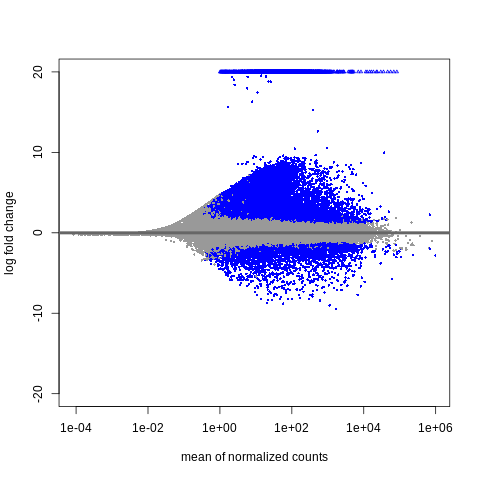

In [ ]:
%%R

plotMA(aml_cll_result, ylim = c(-20, 20))

### CLL vs CML

In [ ]:
%%R

cll_cml_result <- results(dds_analysis, contrast = c("class", "CLL", "CML"), alpha = 0.001, lfcThreshold = 1)

In [ ]:
%%R
print(cll_cml_result)

log2 fold change (MLE): class CLL vs CML 
Wald test p-value: class CLL vs CML 
DataFrame with 76766 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
5S_rRNA      7.27155e-02        0.00000  1.666389   0.00000 1.00000e+00
5_8S_rRNA    8.17911e-02        0.00000  1.470395   0.00000 1.00000e+00
7SK          2.17564e-03        0.00000  6.370264   0.00000 1.00000e+00
A1BG         1.64004e+02        1.33756  0.137642   9.71773 7.09373e-03
A1BG-AS1     1.51206e+02        1.53646  0.102670  14.96513 8.70102e-08
...                  ...            ...       ...       ...         ...
ZZEF1         5149.38500      -0.210393 0.0624929  -3.36667           1
ZZZ3          2200.99391       0.119603 0.0885531   1.35064           1
hsa-mir-1253     0.00000             NA        NA        NA          NA
hsa-mir-423      0.00000             NA        NA        NA          NA
snoZ196          

In [ ]:
%%R
summary(cll_cml_result)


out of 74934 with nonzero total read count
adjusted p-value < 0.001
LFC > 1.00 (up)    : 2719, 3.6%
LFC < -1.00 (down) : 5841, 7.8%
outliers [1]       : 0, 0%
low counts [2]     : 17411, 23%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R

cll_cml_df <- as.data.frame(cll_cml_result)
head(cll_cml_df)

              baseMean log2FoldChange     lfcSE      stat       pvalue
5S_rRNA   7.271551e-02       0.000000 1.6663890  0.000000 1.000000e+00
5_8S_rRNA 8.179106e-02       0.000000 1.4703955  0.000000 1.000000e+00
7SK       2.175641e-03       0.000000 6.3702637  0.000000 1.000000e+00
A1BG      1.640037e+02       1.337564 0.1376416  9.717725 7.093732e-03
A1BG-AS1  1.512064e+02       1.536463 0.1026696 14.965128 8.701016e-08
A1CF      6.070900e+00       1.519702 0.2790942  5.445120 3.129444e-02
                  padj
5S_rRNA             NA
5_8S_rRNA           NA
7SK                 NA
A1BG      3.866699e-02
A1BG-AS1  7.626216e-07
A1CF      1.532564e-01


In [ ]:
%%R

cll_cml_p <- cll_cml_df[!is.na(cll_cml_df$padj) & cll_cml_df$padj < 0.001, ]
head(cll_cml_p)

           baseMean log2FoldChange     lfcSE      stat        pvalue
A1BG-AS1 151.206353       1.536463 0.1026696  14.96513  8.701016e-08
A2ML1     19.619328      -2.222417 0.1993313 -11.14936  4.323063e-10
A3GALT2   14.457594      -2.903293 0.1669786 -17.38722  2.128730e-30
A4GALT    95.934933      -6.785617 0.2369001 -28.64336 4.971826e-132
A4GNT      2.665314      -4.052305 0.3224561 -12.56700  1.456594e-21
AADAT     35.849751      -5.770685 0.3114362 -18.52927  2.883635e-53
                  padj
A1BG-AS1  7.626216e-07
A2ML1     4.300857e-09
A3GALT2   4.114615e-29
A4GALT   7.370988e-130
A4GNT     2.234933e-20
AADAT     8.497711e-52


#### Upregulated

In [ ]:
%%R
## upregulated gene
up_cll_cml <- cll_cml_p[cll_cml_p$log2FoldChange > 1, ]
head(up_cll_cml)

            baseMean log2FoldChange     lfcSE     stat        pvalue
A1BG-AS1  151.206353       1.536463 0.1026696 14.96513  8.701016e-08
ABCA6     859.071249       5.742670 0.2202005 26.07928 3.432744e-103
ABCA9     445.443623       5.071699 0.2856499 17.75495  2.111808e-46
ABCA9-AS1   8.183209       4.855495 0.3375594 14.38412  1.629403e-30
ABCB4     446.832421       4.306651 0.1613723 26.68768  1.299702e-93
ABCD2     205.064855       2.121690 0.1788453 11.86327  1.783939e-10
                   padj
A1BG-AS1   7.626216e-07
ABCA6     2.895333e-101
ABCA9      5.634395e-45
ABCA9-AS1  3.161151e-29
ABCB4      8.633115e-92
ABCD2      1.807601e-09


In [ ]:
%%R
nrow(up_cll_cml)

[1] 2719


In [ ]:
%%R
up_gene_cll_cml <- rownames(up_cll_cml)

In [ ]:
%%R
length(up_gene_cll_cml)

[1] 2719


In [ ]:
%%R

for (gene in up_gene_cll_cml){
    lapply(gene, function(c){write(c, file = "upregulated_genes_cll_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### Downregulated

In [ ]:
%%R
## downregulated gene
down_cll_cml <- cll_cml_p[cll_cml_p$log2FoldChange < -1, ]
head(down_cll_cml)

         baseMean log2FoldChange     lfcSE      stat        pvalue
A2ML1   19.619328      -2.222417 0.1993313 -11.14936  4.323063e-10
A3GALT2 14.457594      -2.903293 0.1669786 -17.38722  2.128730e-30
A4GALT  95.934933      -6.785617 0.2369001 -28.64336 4.971826e-132
A4GNT    2.665314      -4.052305 0.3224561 -12.56700  1.456594e-21
AADAT   35.849751      -5.770685 0.3114362 -18.52927  2.883635e-53
AAED1   29.244706     -28.217672 1.4663625 -19.24331  3.301076e-77
                 padj
A2ML1    4.300857e-09
A3GALT2  4.114615e-29
A4GALT  7.370988e-130
A4GNT    2.234933e-20
AADAT    8.497711e-52
AAED1    1.474284e-75


In [ ]:
%%R
nrow(down_cll_cml)

[1] 5841


In [ ]:
%%R
down_gene_cll_cml <- rownames(down_cll_cml)

In [ ]:
%%R
length(down_gene_cll_cml)

[1] 5841


In [ ]:
%%R

for (gene in down_gene_cll_cml){
    lapply(gene, function(c){write(c, file = "downregulated_genes_cll_cml.txt",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

#### MA plot

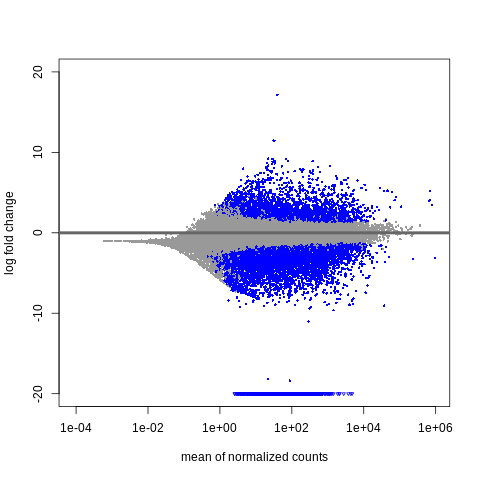

In [ ]:
%%R

plotMA(cll_cml_result, ylim = c(-20, 20))

## Gabung DEG

In [ ]:
%%R

setwd("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train")

### Upregulated Genes

#### Load Data

In [ ]:
%%R
up_all_normal <- as.list(read_lines("upregulated_genes_all_non-leukemia.txt"))

In [ ]:
%%R
up_all_aml <- as.list(read_lines("upregulated_genes_all_aml.txt"))

In [ ]:
%%R
up_all_cll <- as.list(read_lines("upregulated_genes_all_cll.txt"))

In [ ]:
%%R
up_all_cml <- as.list(read_lines("upregulated_genes_all_cml.txt"))

In [ ]:
%%R
up_aml_normal <- as.list(read_lines("upregulated_genes_aml_non-leukemia.txt"))

In [ ]:
%%R
up_aml_cll <- as.list(read_lines("upregulated_genes_aml_cll.txt"))

In [ ]:
%%R
up_aml_cml <- as.list(read_lines("upregulated_genes_aml_cml.txt"))

In [ ]:
%%R
up_cll_normal <- as.list(read_lines("upregulated_genes_cll_non-leukemia.txt"))

In [ ]:
%%R
up_cll_cml <- as.list(read_lines("upregulated_genes_cll_cml.txt"))

In [ ]:
%%R
up_cml_normal <- as.list(read_lines("upregulated_genes_cml_non-leukemia.txt"))

In [ ]:
%%R
length(up_cml_normal)

[1] 661


#### Hitung COV

In [ ]:
%%R
upreg_deg <- list(ALL_vs_normal = up_all_normal,
                  ALL_vs_AML = up_all_aml,
                  ALL_vs_CLL = up_all_cll,
                  ALL_vs_CML = up_all_cml,
                  AML_vs_normal = up_aml_normal,
                  AML_vs_CLL = up_aml_cll,
                  AML_vs_CML = up_aml_cml,
                  CLL_vs_normal = up_cll_normal,
                  CLL_vs_CML = up_cll_cml,
                  CML_vs_normal = up_cml_normal)

In [ ]:
%%R
length(upreg_deg)

[1] 10


In [ ]:
%%R
up_genes <- unique(unlist(upreg_deg))
length(up_genes)

[1] 33677


In [ ]:
%%R
upreg_matrix <- matrix(0, nrow = length(up_genes), ncol = length(upreg_deg))
rownames(upreg_matrix) <- up_genes
colnames(upreg_matrix) <- names(upreg_deg)
head(upreg_matrix)

         ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal
AADACL4              0          0          0          0             0
AARSD1P1             0          0          0          0             0
ABCA1                0          0          0          0             0
ABCA4                0          0          0          0             0
ABCB10P1             0          0          0          0             0
ABCB10P3             0          0          0          0             0
         AML_vs_CLL AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
AADACL4           0          0             0          0             0
AARSD1P1          0          0             0          0             0
ABCA1             0          0             0          0             0
ABCA4             0          0             0          0             0
ABCB10P1          0          0             0          0             0
ABCB10P3          0          0             0          0             0


In [ ]:
%%R
for (i in 1:length(upreg_deg)){
    class_pair <- names(upreg_deg)[i]
    gene_idx <- unlist(upreg_deg[[i]])
    upreg_matrix[gene_idx, class_pair] <- 1
}

In [ ]:
%%R
head(upreg_matrix)

         ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal
AADACL4              1          1          1          1             0
AARSD1P1             1          0          1          1             1
ABCA1                1          1          1          1             0
ABCA4                1          1          1          1             0
ABCB10P1             1          1          1          1             0
ABCB10P3             1          1          1          1             0
         AML_vs_CLL AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
AADACL4           0          0             0          0             0
AARSD1P1          1          1             0          0             0
ABCA1             0          0             0          0             0
ABCA4             1          0             0          0             0
ABCB10P1          0          0             0          0             0
ABCB10P3          0          0             0          0             0


In [ ]:
%%R
COV_score <- rowSums(upreg_matrix)

In [ ]:
%%R
upreg_matrix <- as.data.frame(upreg_matrix)
head(upreg_matrix)

         ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal
AADACL4              1          1          1          1             0
AARSD1P1             1          0          1          1             1
ABCA1                1          1          1          1             0
ABCA4                1          1          1          1             0
ABCB10P1             1          1          1          1             0
ABCB10P3             1          1          1          1             0
         AML_vs_CLL AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
AADACL4           0          0             0          0             0
AARSD1P1          1          1             0          0             0
ABCA1             0          0             0          0             0
ABCA4             1          0             0          0             0
ABCB10P1          0          0             0          0             0
ABCB10P3          0          0             0          0             0


In [ ]:
%%R
upreg_matrix$cov_score <- COV_score

In [ ]:
%%R
head(upreg_matrix)

         ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal
AADACL4              1          1          1          1             0
AARSD1P1             1          0          1          1             1
ABCA1                1          1          1          1             0
ABCA4                1          1          1          1             0
ABCB10P1             1          1          1          1             0
ABCB10P3             1          1          1          1             0
         AML_vs_CLL AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal cov_score
AADACL4           0          0             0          0             0         4
AARSD1P1          1          1             0          0             0         6
ABCA1             0          0             0          0             0         4
ABCA4             1          0             0          0             0         5
ABCB10P1          0          0             0          0             0         4
ABCB10P3          0          0

In [ ]:
%%R
#write.table(upreg_matrix, file = "upregulated_COV.tsv", sep = "\t", col.names = NA,
#            qmethod = "double")

#### Select the Genes

In [ ]:
%%R
high_cov <- subset(upreg_matrix, cov_score >= 5)

In [ ]:
%%R
head(high_cov)

           ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal
AARSD1P1               1          0          1          1             1
ABCA4                  1          1          1          1             0
ABCF2P2                1          0          1          1             1
ABHD15-AS1             1          1          1          1             0
ABHD17AP1              1          0          1          1             1
ABHD17AP3              1          1          1          1             1
           AML_vs_CLL AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
AARSD1P1            1          1             0          0             0
ABCA4               1          0             0          0             0
ABCF2P2             1          1             0          0             0
ABHD15-AS1          1          1             0          0             0
ABHD17AP1           1          1             0          0             0
ABHD17AP3           1          1             0          0       

In [ ]:
%%R
nrow(high_cov)

[1] 11096


In [ ]:
%%R
selected_up_genes <- rownames(high_cov)

In [ ]:
%%R
length(selected_up_genes)

[1] 11096


In [ ]:
%%R

for (gene in selected_up_genes){
    lapply(gene, function(c){write(c, file = "selected_upregulated_genes",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

### Downregulated

#### Load Data

In [ ]:
%%R
down_all_normal <- as.list(read_lines("downregulated_genes_all_non-leukemia.txt"))

In [ ]:
%%R
down_all_aml <- as.list(read_lines("downregulated_genes_all_aml.txt"))

In [ ]:
%%R
down_all_cll <- as.list(read_lines("downregulated_genes_all_cll.txt"))

In [ ]:
%%R
down_all_cml <- as.list(read_lines("downregulated_genes_all_cml.txt"))

In [ ]:
%%R
down_aml_normal <- as.list(read_lines("downregulated_genes_aml_non-leukemia.txt"))

In [ ]:
%%R
down_aml_cll <- as.list(read_lines("downregulated_genes_aml_cll.txt"))

In [ ]:
%%R
down_aml_cml <- as.list(read_lines("downregulated_genes_aml_cml.txt"))

In [ ]:
%%R
down_cll_normal <- as.list(read_lines("downregulated_genes_cll_non-leukemia.txt"))

In [ ]:
%%R
down_cll_cml <- as.list(read_lines("downregulated_genes_cll_cml.txt"))

In [ ]:
%%R
down_cml_normal <- as.list(read_lines("downregulated_genes_cml_non-leukemia.txt"))

In [ ]:
%%R
length(down_cml_normal)

[1] 9047


#### Hitung COV

In [ ]:
%%R
downreg_deg <- list(ALL_vs_normal = down_all_normal,
                    ALL_vs_AML = down_all_aml,
                    ALL_vs_CLL = down_all_cll,
                    ALL_vs_CML = down_all_cml,
                    AML_vs_normal = down_aml_normal,
                    AML_vs_CLL = down_aml_cll,
                    AML_vs_CML = down_aml_cml,
                    CLL_vs_normal = down_cll_normal,
                    CLL_vs_CML = down_cll_cml,
                    CML_vs_normal = down_cml_normal)

In [ ]:
%%R
length(downreg_deg)

[1] 10


In [ ]:
%%R
down_genes <- unique(unlist(downreg_deg))
length(down_genes)

[1] 34726


In [ ]:
%%R
downreg_matrix <- matrix(0, nrow =  length(down_genes), ncol = length(downreg_deg))
rownames(downreg_matrix) <- down_genes
colnames(downreg_matrix) <- names(downreg_deg)
head(downreg_matrix)

       ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal AML_vs_CLL
A1BG               0          0          0          0             0          0
A4GALT             0          0          0          0             0          0
AAAS               0          0          0          0             0          0
AADAT              0          0          0          0             0          0
AAED1              0          0          0          0             0          0
AAMDC              0          0          0          0             0          0
       AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
A1BG            0             0          0             0
A4GALT          0             0          0             0
AAAS            0             0          0             0
AADAT           0             0          0             0
AAED1           0             0          0             0
AAMDC           0             0          0             0


In [ ]:
%%R
for(i in 1:length(downreg_deg)){
    class_pair <- names(downreg_deg)[i]
    gene_idx <- unlist(downreg_deg[[i]])
    downreg_matrix[gene_idx, class_pair] <- 1
}

In [ ]:
%%R
head(downreg_matrix)

       ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal AML_vs_CLL
A1BG               1          0          1          0             0          1
A4GALT             1          0          0          1             0          0
AAAS               1          0          0          0             0          0
AADAT              1          0          0          0             0          0
AAED1              1          1          0          1             0          0
AAMDC              1          1          0          1             0          0
       AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
A1BG            0             0          0             0
A4GALT          0             1          1             0
AAAS            0             0          0             0
AADAT           0             1          1             0
AAED1           0             1          1             0
AAMDC           0             1          0             0


In [ ]:
%%R
COV_down_score <- rowSums(downreg_matrix)

In [ ]:
%%R
downreg_matrix <- as.data.frame(downreg_matrix)
head(downreg_matrix)

       ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal AML_vs_CLL
A1BG               1          0          1          0             0          1
A4GALT             1          0          0          1             0          0
AAAS               1          0          0          0             0          0
AADAT              1          0          0          0             0          0
AAED1              1          1          0          1             0          0
AAMDC              1          1          0          1             0          0
       AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal
A1BG            0             0          0             0
A4GALT          0             1          1             0
AAAS            0             0          0             0
AADAT           0             1          1             0
AAED1           0             1          1             0
AAMDC           0             1          0             0


In [ ]:
%%R
downreg_matrix$cov_score <- COV_down_score

In [ ]:
%%R
head(downreg_matrix)

       ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal AML_vs_CLL
A1BG               1          0          1          0             0          1
A4GALT             1          0          0          1             0          0
AAAS               1          0          0          0             0          0
AADAT              1          0          0          0             0          0
AAED1              1          1          0          1             0          0
AAMDC              1          1          0          1             0          0
       AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal cov_score
A1BG            0             0          0             0         3
A4GALT          0             1          1             0         4
AAAS            0             0          0             0         1
AADAT           0             1          1             0         3
AAED1           0             1          1             0         5
AAMDC           0             1          0   

In [ ]:
%%R
#write.table(downreg_matrix, file = "downregulated_COV.tsv", sep = "\t", col.names = NA,
 #           qmethod = "double")

#### Select the Genes

In [ ]:
%%R
high_cov_down <- subset(downreg_matrix, cov_score >= 5)

In [ ]:
%%R
head(high_cov_down)

        ALL_vs_normal ALL_vs_AML ALL_vs_CLL ALL_vs_CML AML_vs_normal AML_vs_CLL
AAED1               1          1          0          1             0          0
AARS                1          1          0          1             0          0
AATK                1          1          0          1             1          0
ABALON              1          1          1          1             0          0
ABCA11P             1          1          1          1             0          1
ABCA6               1          1          1          1             1          1
        AML_vs_CML CLL_vs_normal CLL_vs_CML CML_vs_normal cov_score
AAED1            0             1          1             0         5
AARS             0             1          1             0         5
AATK             0             1          0             0         5
ABALON           0             1          0             0         5
ABCA11P          0             0          0             0         5
ABCA6            0             0

In [ ]:
%%R
nrow(high_cov_down)

[1] 5080


In [ ]:
%%R
selected_down_genes <- rownames(high_cov_down)

In [ ]:
%%R
length(selected_down_genes)

[1] 5080


In [ ]:
%%R

for (gene in selected_down_genes){
    lapply(gene, function(c){write(c, file = "selected_downregulated_genes",
                                   sep = "\n", append = TRUE,
                                   ncolumns = 100000)})
}

### Gabung Upregulated dan Downregulated

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/selected_upregulated_genes', 'r') as file:
    upregulated_genes = [line.strip() for line in file]

print(upregulated_genes)

['AARSD1P1', 'ABCA4', 'ABCF2P2', 'ABHD15-AS1', 'ABHD17AP1', 'ABHD17AP3', 'ABHD17AP4', 'ABHD17AP5', 'ABHD17AP6', 'ABHD17B', 'AC000036.1', 'AC000050.2', 'AC000065.1', 'AC000065.2', 'AC000068.1', 'AC000068.2', 'AC000078.1', 'AC000082.1', 'AC000085.1', 'AC000120.1', 'AC000123.1', 'AC000123.2', 'AC000123.3', 'AC000403.1', 'AC001226.2', 'AC002056.2', 'AC002059.1', 'AC002059.2', 'AC002059.3', 'AC002064.3', 'AC002070.1', 'AC002075.2', 'AC002091.1', 'AC002091.2', 'AC002094.4', 'AC002128.1', 'AC002128.2', 'AC002306.1', 'AC002310.1', 'AC002310.5', 'AC002347.1', 'AC002350.2', 'AC002381.1', 'AC002401.1', 'AC002401.2', 'AC002401.3', 'AC002456.1', 'AC002458.1', 'AC002460.2', 'AC002463.1', 'AC002464.1', 'AC002467.1', 'AC002480.2', 'AC002519.1', 'AC002543.1', 'AC002546.1', 'AC002550.2', 'AC002553.1', 'AC002553.2', 'AC002558.1', 'AC002558.2', 'AC002558.3', 'AC002984.1', 'AC003002.3', 'AC003005.2', 'AC003035.1', 'AC003043.2', 'AC003070.1', 'AC003077.1', 'AC003080.1', 'AC003093.1', 'AC003102.1', 'AC003681

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/selected_downregulated_genes', 'r') as file:
    downregulated_genes = [line.strip() for line in file]

print(downregulated_genes)

['AAED1', 'AARS', 'AATK', 'ABALON', 'ABCA11P', 'ABCA6', 'ABCB6', 'ABCC3', 'ABCC6P1', 'ABCC6P2', 'ABCF1-DT', 'ABHD1', 'ABHD14A', 'ABHD16B', 'ABHD5', 'ABLIM3', 'ABO', 'ABTB1', 'ACBD3-AS1', 'ACOT11', 'ACOX2', 'ACP3', 'ACP5', 'ACPP', 'ACSL1', 'ACTG1P4', 'ACTL10', 'ACTN1-DT', 'ADAM15', 'ADAM19', 'ADAM1A', 'ADAM28', 'ADAM7-AS1', 'ADAMTS14', 'ADAMTS5', 'ADAMTSL4', 'ADAMTSL4-AS2', 'ADAP1', 'ADCK3', 'ADCK4', 'ADCY2', 'ADGRB3-DT', 'ADGRE1', 'ADGRE2', 'ADGRE3', 'ADGRE4P', 'ADGRG3', 'ADIRF', 'ADM-DT', 'ADORA2A', 'ADPRHL2', 'ADRA2A', 'ADRBK1', 'ADRBK2', 'ADSS', 'ADSSL1', 'AES', 'AFAP1', 'AFTPH-DT', 'AGAP11', 'AGMO', 'AGPAT6', 'AGPAT9', 'AGTRAP', 'AHI1-DT', 'AHSA2', 'AIF1', 'AIG1', 'AIM1', 'AIM2', 'AK4', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AKTIP', 'AL669831.3', 'ALDH1A1', 'ALDH1B1', 'ALDH1L2', 'ALDH2', 'ALDH3B1', 'ALDOA', 'ALKBH6', 'ALOX15', 'ALOX15B', 'ALOX5AP', 'ALPK1', 'ALPL', 'ALS2CR12', 'AMDHD1', 'AMHR2', 'AMICA1', 'AMPD1', 'AMPD2', 'AMT', 'AMY1A', 'AMY1B', 'AMY1C', 'AMY2A', 'ANGPT1', 'ANKK1', 'ANKR

In [ ]:
len(downregulated_genes)

5080

In [ ]:
selected_genes = list(set(upregulated_genes + downregulated_genes))

In [ ]:
len(selected_genes)

16176

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/selected_DEG_genes.txt', 'w+') as f:
  for items in selected_genes:
    f.write('%s\n' %items)

  print("File written succesfully")

File written succesfully


## Filter Dataframe

In [ ]:
with open('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/selected_DEG_genes.txt', 'r') as file:
    selected_genes = [line.strip() for line in file]

print(selected_genes)

['GNAO1-DT', 'LY6G6E', 'AC099332.2', 'AC008759.2', 'AC109466.1', 'AC011815.1', 'LOC105369904', 'LOC105376278', 'CLEC2L', 'AC010768.1', 'LOC107984377', 'AC006557.1', 'AC241585.2', 'PKP2', 'ARHGEF17-AS1', 'TSTD1', 'AL157384.1', 'AC112721.2', 'PCDHB14', 'SNORD38C', 'AC004490.1', 'UHRF1', 'AC104129.1', 'PTPN13', 'MIR4257', 'AC027601.4', 'Z99127.1', 'LOC101927949', 'AL033528.2', 'HBQ1', 'AL136985.3', 'RAB11FIP1P1', 'IFITM3P6', 'DDTL', 'LOC107986761', 'HSPB6', 'AC017071.1', 'ATP5PDP4', 'AC104024.1', 'CTXN2', 'AC023424.1', 'LOC105378305', 'DSCAM', 'LOC107986760', 'AL137060.3', 'CTBS', 'LOC105379505', 'GCOM2', 'AC123912.4', 'VEGFB', 'AC100803.4', 'ABCF1-DT', 'AL442125.2', 'ABHD17AP3', 'AC091138.1', 'AC092042.1', 'AC139491.5', 'AC073343.2', 'AL121950.1', 'RPS15AP36', 'ANKRD34B', 'AC006483.2', 'LOC107987250', 'IGFLR1', 'AC007637.1', 'AC006128.1', 'AC132008.2', 'AC115099.1', 'GAPDHP69', 'WDR60', 'AC114878.1', 'AP002026.1', 'AC005253.1', 'RNU1-91P', 'KDELC2', 'TRAV1-2', 'AC008026.1', 'AL031714.1',

In [ ]:
len(selected_genes)

16176

pake dataset yang udah di-batch corrected

### Training Data

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/preprocessing_data/train_corrected_revisi.tsv", sep = "\t")
df1.head()

,Unnamed: 0,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
0,5S_rRNA,-27.075728,-5.409537,-52.161737,-5.409537,-5.409537,-27.075777,-52.161737,-5.409537,50.834844,...,-83.430072,-5.409537,37.913301,-83.430072,14.865909,-5.409537,54.240759,-5.409537,-5.409537,-5.409537
1,5_8S_rRNA,-71.074323,13.960947,-32.161747,13.960947,13.960947,-71.073853,-32.161747,13.960947,-1.904152,...,-6.379858,13.960947,-6.409404,-6.379858,34.865244,13.960947,10.241238,13.960947,13.960947,13.960947
2,7SK,8.723734,2.871560,-16.193121,2.871560,2.871560,8.723261,-16.193121,2.871560,-38.577077,...,-43.858636,2.871560,-25.492495,-43.858636,50.777060,2.871560,-38.577111,2.871560,2.871560,2.871560
3,A1BG,200.068406,97.479053,127.390025,74.028683,-160.600921,194.452070,202.940443,274.103136,-5.752567,...,275.426833,216.257002,-35.207047,278.162506,41.084315,15.840218,-195.616843,-22.828508,2.092141,54.830168
4,A1BG-AS1,-595.497258,169.033761,-448.448165,204.260185,-1064.161666,-689.195403,-264.444144,451.019616,365.350590,...,-269.658343,496.399051,261.190658,-268.659893,24.540940,21.187817,443.369226,-162.705920,51.442700,226.160736


In [ ]:
train_df = df1.set_index('Unnamed: 0')
train_df.head()

,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,MP2PRT_ALL_1131,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-27.075728,-5.409537,-52.161737,-5.409537,-5.409537,-27.075777,-52.161737,-5.409537,50.834844,-5.409537,...,-83.430072,-5.409537,37.913301,-83.430072,14.865909,-5.409537,54.240759,-5.409537,-5.409537,-5.409537
5_8S_rRNA,-71.074323,13.960947,-32.161747,13.960947,13.960947,-71.073853,-32.161747,13.960947,-1.904152,13.960947,...,-6.379858,13.960947,-6.409404,-6.379858,34.865244,13.960947,10.241238,13.960947,13.960947,13.960947
7SK,8.723734,2.871560,-16.193121,2.871560,2.871560,8.723261,-16.193121,2.871560,-38.577077,2.871560,...,-43.858636,2.871560,-25.492495,-43.858636,50.777060,2.871560,-38.577111,2.871560,2.871560,2.871560
A1BG,200.068406,97.479053,127.390025,74.028683,-160.600921,194.452070,202.940443,274.103136,-5.752567,95.804723,...,275.426833,216.257002,-35.207047,278.162506,41.084315,15.840218,-195.616843,-22.828508,2.092141,54.830168
A1BG-AS1,-595.497258,169.033761,-448.448165,204.260185,-1064.161666,-689.195403,-264.444144,451.019616,365.350590,378.532499,...,-269.658343,496.399051,261.190658,-268.659893,24.540940,21.187817,443.369226,-162.705920,51.442700,226.160736


In [ ]:
train_selected = train_df.loc[selected_genes]
train_selected.head()

,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,MP2PRT_ALL_1131,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,-27.645051,-66.175957,66.020062,-66.175957,-66.175957,-41.516867,66.020062,-66.175957,93.123603,-66.175957,...,88.713216,-66.175957,65.720168,88.430187,50.726246,-66.175957,224.693146,-66.175957,-66.175957,-66.175957
LY6G6E,34.317386,272.063154,-58.012831,115.925247,115.925247,-79.684082,-60.108516,115.925247,-249.742190,186.097826,...,-150.257755,206.169617,-182.762389,-151.689546,-159.978083,115.925247,-267.541690,184.989213,115.925247,217.305345
AC099332.2,-71.788375,117.215324,-95.654754,66.326093,75.886206,-71.788127,-95.654754,33.545784,-79.944698,159.388659,...,-152.274411,152.777274,-102.114086,-152.274411,-93.029120,67.086740,-122.945124,85.070198,57.984477,51.453954
AC008759.2,-88.828399,88.350180,-112.768255,105.326585,323.636357,-88.827930,-112.768255,306.842121,-167.204464,48.217425,...,-169.120187,48.217425,-118.796390,-169.120187,-110.117630,95.259486,-139.716973,48.217425,80.612156,48.217425
AC109466.1,-81.733396,60.041676,-105.362715,42.859985,120.681207,-81.732795,-105.362715,49.548074,-56.991109,54.242609,...,-142.293650,44.332290,-76.148370,-142.293650,-38.819024,62.469876,-69.761579,101.989747,46.863791,54.101427


In [ ]:
print(len(train_selected.index))
print(len(train_selected.columns))

16176
1852


In [ ]:
#train_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/train_DEG_data_revisi.tsv', sep = "\t")

In [ ]:
check_train = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/train_DEG_data_revisi.tsv", sep = "\t")
check_train.head()

,Unnamed: 0,GSM7461809,MP2PRT_ALL_482,GSE277354_67,MP2PRT_ALL_1066,MP2PRT_ALL_613,GSM3028297,GSE277354_65,MP2PRT_ALL_1005,TCGA_LAML_61,...,GSM4280632,MP2PRT_ALL_70,GSM7221895,GSM4280636,GSM7968096,MP2PRT_ALL_232,GSM8013463,MP2PRT_ALL_989,MP2PRT_ALL_339,MP2PRT_ALL_779
0,GNAO1-DT,-27.645051,-66.175957,66.020062,-66.175957,-66.175957,-41.516867,66.020062,-66.175957,93.123603,...,88.713216,-66.175957,65.720168,88.430187,50.726246,-66.175957,224.693146,-66.175957,-66.175957,-66.175957
1,LY6G6E,34.317386,272.063154,-58.012831,115.925247,115.925247,-79.684082,-60.108516,115.925247,-249.742190,...,-150.257755,206.169617,-182.762389,-151.689546,-159.978083,115.925247,-267.541690,184.989213,115.925247,217.305345
2,AC099332.2,-71.788375,117.215324,-95.654754,66.326093,75.886206,-71.788127,-95.654754,33.545784,-79.944698,...,-152.274411,152.777274,-102.114086,-152.274411,-93.029120,67.086740,-122.945124,85.070198,57.984477,51.453954
3,AC008759.2,-88.828399,88.350180,-112.768255,105.326585,323.636357,-88.827930,-112.768255,306.842121,-167.204464,...,-169.120187,48.217425,-118.796390,-169.120187,-110.117630,95.259486,-139.716973,48.217425,80.612156,48.217425
4,AC109466.1,-81.733396,60.041676,-105.362715,42.859985,120.681207,-81.732795,-105.362715,49.548074,-56.991109,...,-142.293650,44.332290,-76.148370,-142.293650,-38.819024,62.469876,-69.761579,101.989747,46.863791,54.101427


In [ ]:
print(len(check_train.index))
print(len(check_train.columns))

16176
1853


### Validation Data

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/preprocessing_data/validation_corrected_revisi.tsv", sep = "\t")
df2.head()

,Unnamed: 0,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
0,5S_rRNA,6.643155,-5.409537,-5.409537,-5.409537,-5.409537,-5.409537,-27.075876,50.834844,14.865909,...,-5.409537,-40.047659,-27.076732,-5.409537,-49.124120,-5.409537,-5.409537,-26.509406,-5.409537,-5.409537
1,5_8S_rRNA,24.847335,13.960947,13.960947,13.960947,13.960947,13.960947,-71.072895,-1.904152,34.865244,...,13.960947,-46.016139,-71.065492,13.960947,-44.141042,13.960947,13.960947,-63.196155,13.960947,13.960947
2,7SK,42.903214,511.242715,2.871560,2.871560,2.871560,2.871560,8.722303,-38.577077,50.777060,...,2.871560,-4.976632,-6.212936,2.871560,-12.418782,2.871560,2.871560,7.708733,2.871560,2.871560
3,A1BG,-34.011216,141.130807,-83.268631,82.751973,74.398056,-99.677252,125.845271,-392.785788,-111.673065,...,108.558042,123.606272,36.751621,219.279147,132.333077,41.042329,117.893128,54.379214,25.427071,377.196649
4,A1BG-AS1,-91.852070,270.309380,89.429363,240.943926,89.485200,111.574612,-606.673837,175.351078,0.584831,...,22.701641,-398.216976,-888.925721,293.483784,-505.194081,103.091014,315.679643,-518.076801,243.639194,683.570723


In [ ]:
valid_df = df2.set_index('Unnamed: 0')
valid_df.head()

,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,MP2PRT_ALL_1011,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,6.643155,-5.409537,-5.409537,-5.409537,-5.409537,-5.409537,-27.075876,50.834844,14.865909,-5.409537,...,-5.409537,-40.047659,-27.076732,-5.409537,-49.124120,-5.409537,-5.409537,-26.509406,-5.409537,-5.409537
5_8S_rRNA,24.847335,13.960947,13.960947,13.960947,13.960947,13.960947,-71.072895,-1.904152,34.865244,13.960947,...,13.960947,-46.016139,-71.065492,13.960947,-44.141042,13.960947,13.960947,-63.196155,13.960947,13.960947
7SK,42.903214,511.242715,2.871560,2.871560,2.871560,2.871560,8.722303,-38.577077,50.777060,2.871560,...,2.871560,-4.976632,-6.212936,2.871560,-12.418782,2.871560,2.871560,7.708733,2.871560,2.871560
A1BG,-34.011216,141.130807,-83.268631,82.751973,74.398056,-99.677252,125.845271,-392.785788,-111.673065,219.789135,...,108.558042,123.606272,36.751621,219.279147,132.333077,41.042329,117.893128,54.379214,25.427071,377.196649
A1BG-AS1,-91.852070,270.309380,89.429363,240.943926,89.485200,111.574612,-606.673837,175.351078,0.584831,226.650065,...,22.701641,-398.216976,-888.925721,293.483784,-505.194081,103.091014,315.679643,-518.076801,243.639194,683.570723


In [ ]:
valid_selected = valid_df.loc[selected_genes]
valid_selected.head()

,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,MP2PRT_ALL_1011,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,69.540261,-66.175957,-66.175957,-66.175957,-66.175957,-66.175957,-54.981518,93.123603,50.726246,-66.175957,...,-66.175957,42.716303,-15.038534,-66.175957,27.806729,-66.175957,-66.175957,12.050217,-66.175957,-66.175957
LY6G6E,-89.483370,176.223791,163.160381,156.003063,243.537211,115.925247,-85.035032,-286.363209,-159.978083,279.450593,...,331.493118,-63.431565,35.410624,272.789286,-92.051722,246.154361,167.912153,-41.107182,115.925247,115.925247
AC099332.2,-84.743189,71.262760,52.456834,78.462820,130.524089,15.758968,-71.787618,-150.848649,-93.029120,134.308474,...,98.429715,-78.346199,-142.040114,97.220722,-99.571386,106.013838,88.639106,-63.774892,110.056103,140.686900
AC008759.2,-101.789462,137.567827,127.696992,104.057431,165.406416,143.680707,-88.826972,-135.442172,-110.117630,117.121172,...,180.684161,-95.470856,-6.488321,98.749526,-116.482574,48.217425,141.707920,-80.727659,105.768779,48.217425
AC109466.1,-47.556687,52.990863,109.319559,107.863161,123.806059,52.414929,-81.731571,-80.563020,-38.819024,104.686789,...,56.942321,-92.239552,-135.489439,54.435971,-104.283420,49.695892,36.823236,-78.304886,92.571538,130.010709


In [ ]:
print(len(valid_selected.index))
print(len(valid_selected.columns))

16176
523


In [ ]:
#valid_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/valid_DEG_data_revisi.tsv', sep = "\t")

In [ ]:
check_valid = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/valid_DEG_data_revisi.tsv', sep = "\t")
check_valid.head()

,Unnamed: 0,GSM1614669,MP2PRT_ALL_1024,MP2PRT_ALL_1241,MP2PRT_ALL_337,MP2PRT_ALL_161,MP2PRT_ALL_118,GSM1256824,TCGA_LAML_86,GSM7968123,...,MP2PRT_ALL_1159,GSM4280562,NBM13_CD34,MP2PRT_ALL_865,GSM4983932,MP2PRT_ALL_944,MP2PRT_ALL_1227,GSM6062693,MP2PRT_ALL_30,MP2PRT_ALL_1218
0,GNAO1-DT,69.540261,-66.175957,-66.175957,-66.175957,-66.175957,-66.175957,-54.981518,93.123603,50.726246,...,-66.175957,42.716303,-15.038534,-66.175957,27.806729,-66.175957,-66.175957,12.050217,-66.175957,-66.175957
1,LY6G6E,-89.483370,176.223791,163.160381,156.003063,243.537211,115.925247,-85.035032,-286.363209,-159.978083,...,331.493118,-63.431565,35.410624,272.789286,-92.051722,246.154361,167.912153,-41.107182,115.925247,115.925247
2,AC099332.2,-84.743189,71.262760,52.456834,78.462820,130.524089,15.758968,-71.787618,-150.848649,-93.029120,...,98.429715,-78.346199,-142.040114,97.220722,-99.571386,106.013838,88.639106,-63.774892,110.056103,140.686900
3,AC008759.2,-101.789462,137.567827,127.696992,104.057431,165.406416,143.680707,-88.826972,-135.442172,-110.117630,...,180.684161,-95.470856,-6.488321,98.749526,-116.482574,48.217425,141.707920,-80.727659,105.768779,48.217425
4,AC109466.1,-47.556687,52.990863,109.319559,107.863161,123.806059,52.414929,-81.731571,-80.563020,-38.819024,...,56.942321,-92.239552,-135.489439,54.435971,-104.283420,49.695892,36.823236,-78.304886,92.571538,130.010709


In [ ]:
print(len(check_valid.index))
print(len(check_valid.columns))

16176
524


### Testing Data

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/preprocessing_data/testing_corrected_revisi.tsv", sep = "\t")
df3.head()

,Unnamed: 0,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
0,5S_rRNA,-8.242759,-27.075728,-8.242759,54.239404,-5.409537,50.834844,-27.075777,50.834844,-5.409537,...,3.392484,54.240759,-5.409537,-27.076258,14.865909,-52.159645,-5.054984,54.240759,54.239404,-83.430072
1,5_8S_rRNA,-49.757284,-71.074323,-49.757284,10.240663,13.960947,-1.904152,-71.073853,-1.904152,13.960947,...,-31.483815,10.241238,13.960947,-71.069559,34.865244,-32.162298,-44.375280,10.241238,10.240663,-6.379858
2,7SK,-8.621170,8.723734,-8.621170,-38.576710,2.871560,-38.577077,8.723261,-38.577077,2.871560,...,36.565224,-38.577111,2.871560,8.718889,50.777060,-16.194757,-11.845166,-38.577111,-38.576710,-43.858636
3,A1BG,-30.241759,16.756881,-32.855512,-31.134451,16.643929,17.699555,112.088161,-141.983097,355.649889,...,-62.689732,37.270901,-14.219469,111.707499,-25.650018,151.041793,-35.126907,-45.584463,11.170705,277.480195
4,A1BG-AS1,-550.384035,-605.051652,-549.659561,507.434087,123.120156,571.803344,-614.150338,270.206590,544.450326,...,-430.007743,548.208015,36.761438,-721.235877,46.954764,-499.216136,-506.052062,407.329665,427.880948,-268.457051


In [ ]:
test_df = df3.set_index('Unnamed: 0')
test_df.head()

,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,MP2PRT_ALL_876,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-8.242759,-27.075728,-8.242759,54.239404,-5.409537,50.834844,-27.075777,50.834844,-5.409537,88.314693,...,3.392484,54.240759,-5.409537,-27.076258,14.865909,-52.159645,-5.054984,54.240759,54.239404,-83.430072
5_8S_rRNA,-49.757284,-71.074323,-49.757284,10.240663,13.960947,-1.904152,-71.073853,-1.904152,13.960947,13.960947,...,-31.483815,10.241238,13.960947,-71.069559,34.865244,-32.162298,-44.375280,10.241238,10.240663,-6.379858
7SK,-8.621170,8.723734,-8.621170,-38.576710,2.871560,-38.577077,8.723261,-38.577077,2.871560,2.871560,...,36.565224,-38.577111,2.871560,8.718889,50.777060,-16.194757,-11.845166,-38.577111,-38.576710,-43.858636
A1BG,-30.241759,16.756881,-32.855512,-31.134451,16.643929,17.699555,112.088161,-141.983097,355.649889,115.412344,...,-62.689732,37.270901,-14.219469,111.707499,-25.650018,151.041793,-35.126907,-45.584463,11.170705,277.480195
A1BG-AS1,-550.384035,-605.051652,-549.659561,507.434087,123.120156,571.803344,-614.150338,270.206590,544.450326,237.675200,...,-430.007743,548.208015,36.761438,-721.235877,46.954764,-499.216136,-506.052062,407.329665,427.880948,-268.457051


In [ ]:
test_selected = test_df.loc[selected_genes]
test_selected.head()

,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,MP2PRT_ALL_876,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GNAO1-DT,16.867636,-27.645051,16.867636,80.220738,-66.175957,93.123603,10.171077,93.123603,-66.175957,-66.175957,...,40.944270,73.911763,-66.175957,-15.034007,106.866354,138.166391,20.550156,73.911763,85.155650,88.266315
LY6G6E,-94.491832,4.932561,-94.491832,-298.266671,194.691520,-202.534414,-79.684082,-251.786232,283.365831,225.161218,...,-98.163344,-168.825069,148.113417,-90.554737,-159.978083,-59.837465,-99.885305,-66.520874,-298.266671,-152.916837
AC099332.2,-99.522864,-71.788375,-99.522864,-122.943434,76.516967,-97.415968,-71.788127,-68.072912,159.028974,91.018022,...,-95.080760,-122.945124,50.100143,-116.613752,-93.029120,-95.650359,-98.373043,-122.945124,-122.943434,-152.274411
AC008759.2,-116.287739,-88.828399,-116.287739,-139.714967,237.507240,-194.012090,-88.827930,-140.800304,111.125250,127.279832,...,-111.852060,-139.716973,130.234020,-30.874925,-110.117630,-112.761902,-114.603204,-139.716973,-139.714967,-169.120187
AC109466.1,-70.380841,-81.733396,-70.380841,-69.760671,108.701822,-74.450068,-81.732795,-77.998792,124.214004,68.600144,...,-47.579069,-69.761579,56.499250,-120.476469,-38.819024,-105.355081,-71.889533,-69.761579,-69.760671,-142.293650


In [ ]:
print(len(test_selected.index))
print(len(test_selected.columns))

16176
263


In [ ]:
#test_selected.to_csv('/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/test_DEG_data_revisi.tsv', sep = "\t")

In [ ]:
check_test = pd.read_csv("/content/drive/MyDrive/Tugas Akhir/DEG_revisi_train/test_DEG_data_revisi.tsv", sep ='\t')
check_test.head()

,Unnamed: 0,7653-HSC,GSM7461821,7256-Mono,GSM1554643,MP2PRT_ALL_818,TCGA_LAML_97,GSM3028278,TCGA_LAML_132,MP2PRT_ALL_1280,...,GSM3104743,GSM8013522,MP2PRT_ALL_756,NBM4_CD14,GSM7968109,GSM6340864,GSM4116460,GSM8013450,GSM1554629,GSM4280633
0,GNAO1-DT,16.867636,-27.645051,16.867636,80.220738,-66.175957,93.123603,10.171077,93.123603,-66.175957,...,40.944270,73.911763,-66.175957,-15.034007,106.866354,138.166391,20.550156,73.911763,85.155650,88.266315
1,LY6G6E,-94.491832,4.932561,-94.491832,-298.266671,194.691520,-202.534414,-79.684082,-251.786232,283.365831,...,-98.163344,-168.825069,148.113417,-90.554737,-159.978083,-59.837465,-99.885305,-66.520874,-298.266671,-152.916837
2,AC099332.2,-99.522864,-71.788375,-99.522864,-122.943434,76.516967,-97.415968,-71.788127,-68.072912,159.028974,...,-95.080760,-122.945124,50.100143,-116.613752,-93.029120,-95.650359,-98.373043,-122.945124,-122.943434,-152.274411
3,AC008759.2,-116.287739,-88.828399,-116.287739,-139.714967,237.507240,-194.012090,-88.827930,-140.800304,111.125250,...,-111.852060,-139.716973,130.234020,-30.874925,-110.117630,-112.761902,-114.603204,-139.716973,-139.714967,-169.120187
4,AC109466.1,-70.380841,-81.733396,-70.380841,-69.760671,108.701822,-74.450068,-81.732795,-77.998792,124.214004,...,-47.579069,-69.761579,56.499250,-120.476469,-38.819024,-105.355081,-71.889533,-69.761579,-69.760671,-142.293650


In [ ]:
print(len(check_test.index))
print(len(check_test.columns))

16176
264
